# Ïò§ÎäòÏùò IRS Í∏àÎ¶¨Î•º Î∂ÄÌä∏Ïä§Ìä∏ÎûòÌïëÌï¥ P(0,T)Íµ¨ÌïòÍ∏∞(ÌòÑÏû¨Ïùò Ï†úÎ°úÏø†Ìè∞Ï±ÑÍ∂åÍ∞ÄÍ≤©)

IRS Í∏àÎ¶¨ Î∂ÄÌä∏Ïä§Ìä∏ÎûòÌïë - P(0,T) Í≥ÑÏÇ∞

[1Îã®Í≥Ñ] Par Í∏àÎ¶¨ Î≥¥Í∞Ñ (Cubic Spline)
‚úì 1ÎÖÑÎ∂ÄÌÑ∞ 30ÎÖÑÍπåÏßÄ Î≥¥Í∞Ñ ÏôÑÎ£å

[2Îã®Í≥Ñ] Ìï†Ïù∏Í≥ÑÏàò Î∂ÄÌä∏Ïä§Ìä∏Îû© (Í≥†Ï†ï Îã§Î¶¨ ÎπàÎèÑ: 1Ìöå/ÎÖÑ)
‚úì 30Í∞ú ÎßåÍ∏∞Ïùò Ìï†Ïù∏Í≥ÑÏàò Í≥ÑÏÇ∞ ÏôÑÎ£å

Î∂ÄÌä∏Ïä§Ìä∏Îû© Í≤∞Í≥º
 T (yrs)   Par S_T (%)        P(0,T)   Zero y_simple (%)   Zero z_cont (%)
----------------------------------------------------------------------
       1        3.6490    0.96479464            3.649000          3.584000
       2        3.3950    0.93548549            3.390699          3.334482
       3        3.3350    0.90639731            3.330167          3.275918
       4        3.3368    0.87708150            3.333232          3.278884
       5        3.3580    0.84782927            3.356625          3.301520
       6        3.3996    0.81813352            3.402086          3.345495
       7        3.4520    0.78812165            3.459980          3.401469
       8        3.5053    0.75827102            3.5194

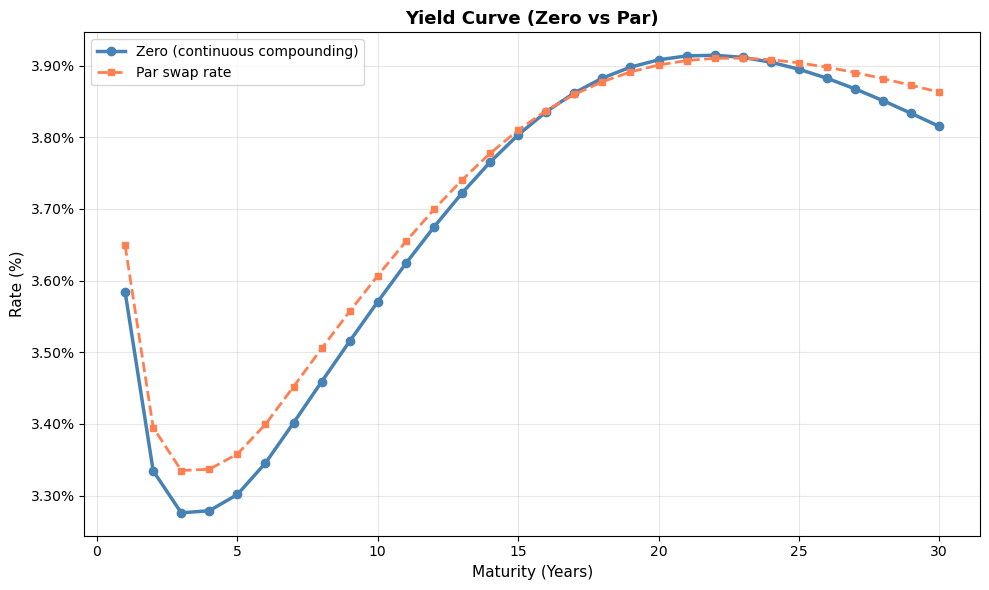


Î∂ÄÌä∏Ïä§Ìä∏ÎûòÌïë ÏôÑÎ£å! Îã§Ïùå Îã®Í≥ÑÎ•º ÏßÑÌñâÌïòÏÑ∏Ïöî.

Î∞òÌôòÎêú Î≥ÄÏàò:
  - P_year: Ìï†Ïù∏Í≥ÑÏàò ÎîïÏÖîÎÑàÎ¶¨ {T: P(0,T)}
  - par_full: Î≥¥Í∞ÑÎêú Par Í∏àÎ¶¨ ÎîïÏÖîÎÑàÎ¶¨ {T: S_T}


In [1]:
import numpy as np
from math import log, exp
import csv
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
# Î™®Îì† ÏÑ§Ï†ï ÏôÑÏ†Ñ Ï¥àÍ∏∞Ìôî
plt.rcdefaults()

# =============================================================================
# USER INPUT
# =============================================================================
PAR_RATES_PCT = {
    1: 3.649,
    2: 3.395,
    3: 3.335,
    5: 3.358,
    7: 3.452,
    10: 3.607,
    15: 3.810,
    30: 3.863,
}
FREQ = 1   # Í≥†Ï†ï Îã§Î¶¨ ÏßÄÍ∏â ÎπàÎèÑ (1=Ïó∞ 1Ìöå, 2=Ïó∞ 2Ìöå)

# =============================================================================
# Helper Functions
# =============================================================================
def fill_annual_par_curve_cubic(par_rates_pct):
    """Cubic SplineÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÎàÑÎùΩÎêú Ïó∞Í∞Ñ Par Í∏àÎ¶¨Î•º Î≥¥Í∞Ñ"""
    known = sorted((int(T), v / 100.0) for T, v in par_rates_pct.items())
    known_T = [kv[0] for kv in known]
    known_S = [kv[1] for kv in known]
    maxT = known_T[-1]

    # bc_type='natural'Î°ú Ïô∏ÏÇΩ Ïãú Í≥ºÎèÑÌïú Î≥ÄÎèô Î∞©ÏßÄ
    spline = CubicSpline(known_T, known_S, bc_type='natural')
    all_T = range(1, maxT + 1)
    all_S = spline(all_T)

    return dict(zip(all_T, all_S))

def make_coupon_times(T, freq):
    """Ïä§ÏôëÏùò Ïø†Ìè∞ ÏßÄÍ∏â ÏãúÏ†ê ÏÉùÏÑ±"""
    delta = 1.0 / freq
    n = int(round(T * freq))
    return [i * delta for i in range(1, n + 1)], delta

def get_P_interpolator(P_year):
    """ÌòÑÏû¨ÍπåÏßÄ ÏïåÎ†§ÏßÑ Ìï†Ïù∏Í≥ÑÏàò Í∏∞Î∞ò Î≥¥Í∞Ñ Ìï®Ïàò ÏÉùÏÑ± (log-linear)"""
    known_points = sorted([(0, 1.0)] + list(P_year.items()))

    if len(known_points) < 2:
        return P_year.get

    known_T = [p[0] for p in known_points]
    known_lnP = [log(p[1]) for p in known_points]

    # log(P)Î•º Ïä§ÌîåÎùºÏù∏ Î≥¥Í∞ÑÌïòÏó¨ ÏñëÏùò Ìï†Ïù∏Í≥ÑÏàò Î≥¥Ïû•
    spline = CubicSpline(known_T, known_lnP, bc_type='natural')

    return lambda t: exp(spline(t))

# =============================================================================
# Core Bootstrap
# =============================================================================
def bootstrap_discounts_from_par(par_rates_dec, freq=1):
    """
    Par Í∏àÎ¶¨Î°úÎ∂ÄÌÑ∞ Ìï†Ïù∏Í≥ÑÏàò P(0,T) Î∂ÄÌä∏Ïä§Ìä∏Îû©

    Ïä§Ïôë Î∞∏Î•òÏóêÏù¥ÏÖò:
    Í≥†Ï†ï Îã§Î¶¨: Œ£ S¬∑Œ¥¬∑P(0,ti) + P(0,T)
    Î≥ÄÎèô Îã§Î¶¨: 1 (at inception, par swap)

    Îî∞ÎùºÏÑú: 1 = Œ£ S¬∑Œ¥¬∑P(0,ti) + P(0,T)
    => P(0,T) = [1 - S¬∑Œ¥¬∑Œ£ P(0,ti)] / (1 + S¬∑Œ¥) (ÎßàÏßÄÎßâ Ìï≠ Ï†úÏô∏)
    """
    P_year = {}

    for T in sorted(par_rates_dec.keys()):
        S = par_rates_dec[T]  # Par swap rate (decimal)
        coupon_times, delta = make_coupon_times(T, freq)

        # Ïù¥Ï†ÑÍπåÏßÄ Íµ¨Ìïú Ìï†Ïù∏Í≥ÑÏàòÎ°ú Î≥¥Í∞Ñ Ìï®Ïàò ÏÉùÏÑ±
        P_interpolator = get_P_interpolator(P_year)

        # ÎßàÏßÄÎßâ ÏãúÏ†êÏùÑ Ï†úÏô∏Ìïú Ïø†Ìè∞ ÏßÄÍ∏âÏùò ÌòÑÏû¨Í∞ÄÏπò Ìï©
        known_sum = sum(P_interpolator(ti) for ti in coupon_times[:-1])

        # ÎßàÏßÄÎßâ ÏãúÏ†ê TÏùò Ìï†Ïù∏Í≥ÑÏàò Í≥ÑÏÇ∞
        # 1 = S¬∑Œ¥¬∑known_sum + S¬∑Œ¥¬∑P(T) + P(T)
        # 1 = S¬∑Œ¥¬∑known_sum + P(T)¬∑(1 + S¬∑Œ¥)
        numerator = 1.0 - S * delta * known_sum
        denom = 1.0 + S * delta
        P_T = numerator / denom

        P_year[T] = P_T

    return P_year

# =============================================================================
# Visualization
# =============================================================================
def plot_yield_curve(par_full, P_year, which="cont",
                     title="Yield Curve (Zero vs Par)"):
    """ÏàòÏùµÎ•† Í≥°ÏÑ† ÏãúÍ∞ÅÌôî"""
    Tz = np.array(sorted(P_year.keys()), dtype=float)
    Pz = np.array([P_year[int(T)] for T in Tz], dtype=float)

    # Zero rate Í≥ÑÏÇ∞
    if which == "cont":
        zero = -np.log(Pz) / Tz
        label_zero = "Zero (continuous compounding)"
    elif which == "simple":
        zero = Pz**(-1.0 / Tz) - 1.0
        label_zero = "Zero (simple compounding)"
    else:
        raise ValueError("which must be 'cont' or 'simple'")

    # Par rate
    Tp = np.array(sorted(par_full.keys()), dtype=float)
    Spar = np.array([par_full[int(T)] for T in Tp], dtype=float)

    # ÌîåÎ°Ø
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(Tz, 100*zero, marker="o", lw=2.5, label=label_zero,
            markersize=6, color='steelblue')
    ax.plot(Tp, 100*Spar, linestyle="--", marker="s", lw=2,
            label="Par swap rate", markersize=5, color='coral')

    ax.yaxis.set_major_formatter(PercentFormatter())
    ax.set_xlabel("Maturity (Years)", fontsize=11)
    ax.set_ylabel("Rate (%)", fontsize=11)
    ax.set_title(title, fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=10)

    plt.tight_layout()
    plt.show()

# =============================================================================
# Main Execution
# =============================================================================
def main():
    print("=" * 70)
    print("IRS Í∏àÎ¶¨ Î∂ÄÌä∏Ïä§Ìä∏ÎûòÌïë - P(0,T) Í≥ÑÏÇ∞")
    print("=" * 70)

    # 1) Par Í∏àÎ¶¨ Î≥¥Í∞Ñ
    print(f"\n[1Îã®Í≥Ñ] Par Í∏àÎ¶¨ Î≥¥Í∞Ñ (Cubic Spline)")
    par_full = fill_annual_par_curve_cubic(PAR_RATES_PCT)
    print(f"‚úì 1ÎÖÑÎ∂ÄÌÑ∞ {max(par_full.keys())}ÎÖÑÍπåÏßÄ Î≥¥Í∞Ñ ÏôÑÎ£å")

    # 2) Î∂ÄÌä∏Ïä§Ìä∏Îû© Ïã§Ìñâ
    print(f"\n[2Îã®Í≥Ñ] Ìï†Ïù∏Í≥ÑÏàò Î∂ÄÌä∏Ïä§Ìä∏Îû© (Í≥†Ï†ï Îã§Î¶¨ ÎπàÎèÑ: {FREQ}Ìöå/ÎÖÑ)")
    P_year = bootstrap_discounts_from_par(par_full, freq=FREQ)
    print(f"‚úì {len(P_year)}Í∞ú ÎßåÍ∏∞Ïùò Ìï†Ïù∏Í≥ÑÏàò Í≥ÑÏÇ∞ ÏôÑÎ£å")

    # 3) Í≤∞Í≥º Ï∂úÎ†•
    print("\n" + "=" * 70)
    print("Î∂ÄÌä∏Ïä§Ìä∏Îû© Í≤∞Í≥º")
    print("=" * 70)

    header = ["T (yrs)", "Par S_T (%)", "P(0,T)",
              "Zero y_simple (%)", "Zero z_cont (%)"]
    rows = []

    for T in sorted(P_year.keys()):
        PT = P_year[T]
        y_simple = PT ** (-1.0 / T) - 1.0  # (1+y)^T = 1/P
        z_cc = -log(PT) / T                 # e^(-z*T) = P
        rows.append([T, 100.0 * par_full[T], PT,
                    100.0 * y_simple, 100.0 * z_cc])

    print("{:>8}  {:>12}  {:>12}  {:>18}  {:>16}".format(*header))
    print("-" * 70)
    for r in rows:
        print("{:8.0f}  {:12.4f}  {:12.8f}  {:18.6f}  {:16.6f}".format(*r))

    # 4) Ï£ºÏöî ÌÜµÍ≥Ñ
    print("\n" + "=" * 70)
    print("Ï£ºÏöî ÌÜµÍ≥Ñ")
    print("=" * 70)

    zero_rates_cc = [-log(P_year[T]) / T for T in sorted(P_year.keys())]
    par_rates = [par_full[T] for T in sorted(par_full.keys())]

    print(f"Par Í∏àÎ¶¨ Î≤îÏúÑ: {min(par_rates)*100:.3f}% ~ {max(par_rates)*100:.3f}%")
    print(f"Zero Í∏àÎ¶¨ Î≤îÏúÑ (Ïó∞ÏÜç): {min(zero_rates_cc)*100:.3f}% ~ {max(zero_rates_cc)*100:.3f}%")
    print(f"P(0,1): {P_year[1]:.8f}")
    print(f"P(0,10): {P_year[10]:.8f}")
    print(f"P(0,30): {P_year[30]:.8f}")

    # 5) CSV Ï†ÄÏû•
    csv_filename = "bootstrapped_discounts.csv"
    with open(csv_filename, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(header)
        writer.writerows(rows)
    print(f"\n‚úì Í≤∞Í≥ºÍ∞Ä '{csv_filename}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

    # 6) Í∑∏ÎûòÌîÑ ÌëúÏãú
    print("\n[3Îã®Í≥Ñ] ÏàòÏùµÎ•† Í≥°ÏÑ† ÏãúÍ∞ÅÌôî")
    plot_yield_curve(par_full, P_year, which="cont")

    return P_year, par_full

# =============================================================================
# Execute
# =============================================================================
if __name__ == "__main__":
    P_year, par_full = main()

    print("\n" + "=" * 70)
    print("Î∂ÄÌä∏Ïä§Ìä∏ÎûòÌïë ÏôÑÎ£å! Îã§Ïùå Îã®Í≥ÑÎ•º ÏßÑÌñâÌïòÏÑ∏Ïöî.")
    print("=" * 70)
    print("\nÎ∞òÌôòÎêú Î≥ÄÏàò:")
    print("  - P_year: Ìï†Ïù∏Í≥ÑÏàò ÎîïÏÖîÎÑàÎ¶¨ {T: P(0,T)}")
    print("  - par_full: Î≥¥Í∞ÑÎêú Par Í∏àÎ¶¨ ÎîïÏÖîÎÑàÎ¶¨ {T: S_T}")

# ÏúÑÏùò Ï†úÎ°úÍ∏àÎ¶¨Î•º Î∞îÌÉïÏúºÎ°ú ÏÑ†ÎèÑÍ∏àÎ¶¨Ìï®ÏàòÎ•º ÎßåÎì§Í≥† phi Ìï®Ïàò Íµ¨ÌïòÍ∏∞

G2++ œÜ(t) Ìï®Ïàò Í≥ÑÏÇ∞

ÏÇ¨Ïö© Ï§ëÏù∏ G2++ ÌååÎùºÎØ∏ÌÑ∞:
  a: 0.268
  b: 0.337
  sigma: 0.0179
  eta: 0.0144
  rho: 0.977

[1Îã®Í≥Ñ] ÏÑ†ÎèÑÍ∏àÎ¶¨ Î∞è œÜ(t) Ìï®Ïàò ÏÉùÏÑ± Ï§ë...
‚úì Ìï®Ïàò ÏÉùÏÑ± ÏôÑÎ£å

[2Îã®Í≥Ñ] ÏÉòÌîå Í∞í Ï∂úÎ†•

   t (ÎÖÑ)      f(0,t) (%)        œÜ(t) (%)         Ï∞®Ïù¥ (bp)
     0.5          3.6062          3.6173            1.11
     1.0          3.3736          3.4121            3.86
     2.0          3.1300          3.2470           11.71
     3.0          3.0377          3.2407           20.30
     5.0          2.4204          2.7702           34.98
     7.0          2.1310          2.5796           44.86
    10.0          2.0796          2.6091           52.94
    15.0          1.6542          2.2316           57.73
    20.0          1.1308          1.7201           58.92
    30.0          0.7121          1.3050           59.29

[3Îã®Í≥Ñ] ÏãúÍ∞ÅÌôî


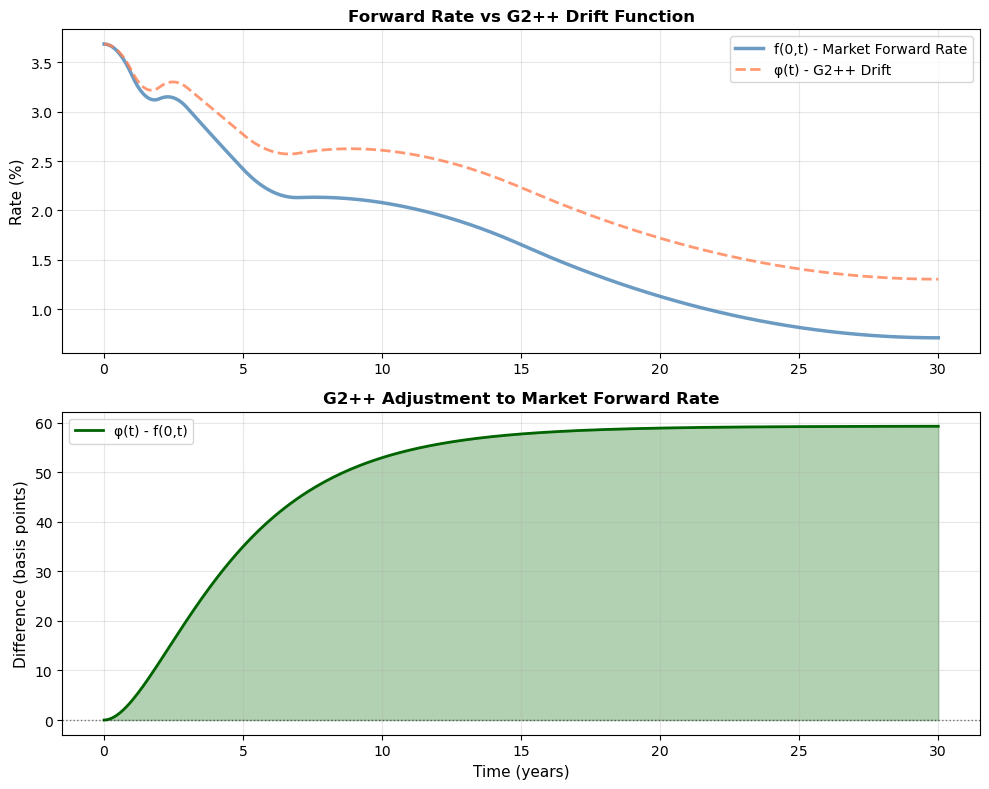


‚úì œÜ(t) Ìï®Ïàò ÏÉùÏÑ± ÏôÑÎ£å!

Îã§Ïùå Îã®Í≥Ñ:
  1. G2++ ÌååÎùºÎØ∏ÌÑ∞ Î≥¥Ï†ï (Ïä§ÏôëÏÖò ÏãúÏû• Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)
  2. Î™¨ÌÖåÏπ¥Î•ºÎ°úÎ°ú r(t) = x(t) + y(t) + œÜ(t) ÏãúÎÆ¨Î†àÏù¥ÏÖò
  3. CMS Ïä§ÌîÑÎ†àÎìú ÎÖ∏Ìä∏ Í∞ÄÍ≤©Í≤∞Ï†ï

Î∞òÌôòÎêú Ìï®Ïàò:
  - phi_func(t): œÜ(t) Í∞í Î∞òÌôò
  - f0_func(t): f(0,t) Í∞í Î∞òÌôò


In [2]:
"""
G2++ Î™®Îç∏Ïùò œÜ(t) Ìï®Ïàò Í≥ÑÏÇ∞
- ÏãúÏû• Ìï†Ïù∏Í≥°ÏÑ† P(0,T)Î°úÎ∂ÄÌÑ∞ ÏÑ†ÎèÑÍ∏àÎ¶¨ f(0,t) Ï∂îÏ∂ú
- G2++ ÌååÎùºÎØ∏ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ œÜ(t) Í≤∞Ï†ï
"""

import numpy as np
from math import exp, log
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# =============================================================================
# Ïä§ÌîåÎùºÏù∏ Î∞è ÏÑ†ÎèÑÍ∏àÎ¶¨ ÏÉùÏÑ±
# =============================================================================
def make_lnP_spline(P_year: dict):
    """
    ÏûÖÎ†•: P_year = {T:int -> P(0,T):float}
    Ï∂úÎ†•:
        - spline_lnP: log(P(t)) Ïä§ÌîåÎùºÏù∏ Ìï®Ïàò
        - f0: ÏàúÍ∞Ñ ÏÑ†ÎèÑÍ∏àÎ¶¨ f(0,t) = -d[ln P(0,t)]/dt
    """
    # (0, 1.0) Ìè¨Ìï®ÌïòÏó¨ ÏûêÏó∞Ïä§ÌîåÎùºÏù∏ Íµ¨ÏÑ±
    Ts = [0.0] + sorted(float(T) for T in P_year.keys())
    lnPs = [0.0] + [log(P_year[int(T)]) for T in sorted(P_year.keys())]

    # Natural boundary conditionÏúºÎ°ú Ïô∏ÏÇΩ ÏïàÏ†ïÌôî
    spline_lnP = CubicSpline(Ts, lnPs, bc_type="natural")
    spline_dlnP = spline_lnP.derivative()

    def f0(t: float) -> float:
        """
        ÏàúÍ∞Ñ ÏÑ†ÎèÑÍ∏àÎ¶¨ f(0,t) (Ïó∞ÏÜçÎ≥µÎ¶¨, Ïó∞ Îã®ÏúÑ)
        f(0,t) = -d[ln P(0,t)]/dt
        """
        if t < 1e-9:
            # t=0ÏóêÏÑúÎäî Ïö∞Ï∏° ÎØ∏Î∂Ñ Í∑ºÏÇ¨
            dt = 1e-6
            return -float(spline_dlnP(dt))
        return -float(spline_dlnP(t))

    return spline_lnP, f0

# =============================================================================
# G2++ œÜ(t) Ìï®Ïàò ÏÉùÏÑ±
# =============================================================================
def phi_g2pp_factory(P_year: dict, a: float, b: float,
                     sigma: float, eta: float, rho: float):
    """
    G2++ Î™®Îç∏Ïùò œÜ(t) Ìï®Ïàò ÏÉùÏÑ±

    ÌååÎùºÎØ∏ÌÑ∞:
        P_year: ÏãúÏû• Ìï†Ïù∏Í≥ÑÏàò ÎîïÏÖîÎÑàÎ¶¨
        a, b: mean reversion ÏÜçÎèÑ (1/ÎÖÑ)
        sigma, eta: Î≥ÄÎèôÏÑ± (1/‚àöÎÖÑ)
        rho: ÏÉÅÍ¥ÄÍ≥ÑÏàò

    Î∞òÌôò:
        phi: œÜ(t) Ìï®Ïàò
        f0: ÏàúÍ∞Ñ ÏÑ†ÎèÑÍ∏àÎ¶¨ f(0,t) Ìï®Ïàò

    G2++ Î™®Îç∏:
        r(t) = x(t) + y(t) + œÜ(t)
        dx(t) = -a¬∑x(t)dt + œÉ¬∑dW‚ÇÅ(t)
        dy(t) = -b¬∑y(t)dt + Œ∑¬∑dW‚ÇÇ(t)
        dW‚ÇÅ¬∑dW‚ÇÇ = œÅ¬∑dt

    œÜ(t)Îäî Îã§ÏùåÏùÑ ÎßåÏ°±:
        œÜ(t) = f^M(0,t) + (œÉ¬≤/2a¬≤)(1-e^(-at))¬≤ + (Œ∑¬≤/2b¬≤)(1-e^(-bt))¬≤
                        + (œÅœÉŒ∑/ab)(1-e^(-at))(1-e^(-bt))
    """
    spline_lnP, f0 = make_lnP_spline(P_year)

    def phi(t: float) -> float:
        """œÜ(t) Ìï®Ïàò"""
        if t < 1e-9:
            t = 1e-9  # 0ÏúºÎ°ú ÎÇòÎàÑÍ∏∞ Î∞©ÏßÄ

        ea = exp(-a * t)
        eb = exp(-b * t)

        # x ÌîÑÎ°úÏÑ∏Ïä§ Í∏∞Ïó¨Î∂Ñ
        term_x = (sigma**2) / (2.0 * a**2) * (1.0 - ea)**2

        # y ÌîÑÎ°úÏÑ∏Ïä§ Í∏∞Ïó¨Î∂Ñ
        term_y = (eta**2) / (2.0 * b**2) * (1.0 - eb)**2

        # ÏÉÅÍ¥Ä Ìï≠
        cross = (rho * sigma * eta) / (a * b) * (1.0 - ea) * (1.0 - eb)

        return f0(t) + term_x + term_y + cross

    return phi, f0

# =============================================================================
# ÏãúÍ∞ÅÌôî
# =============================================================================
def plot_forward_and_phi(phi_func, f0_func, max_T: float = 30.0):
    """ÏÑ†ÎèÑÍ∏àÎ¶¨ f(0,t)ÏôÄ œÜ(t)Î•º Ìïú Í∑∏ÎûòÌîÑÏóê ÎπÑÍµê"""
    ts = np.linspace(0.01, max_T, 300)

    phi_vals = np.array([phi_func(t) for t in ts]) * 100
    f0_vals = np.array([f0_func(t) for t in ts]) * 100
    diff_vals = (phi_vals - f0_vals) * 100  # basis points

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    # ÏÉÅÎã®: f(0,t)ÏôÄ œÜ(t) ÎπÑÍµê
    ax1.plot(ts, f0_vals, linewidth=2.5, color='steelblue', label='f(0,t) - Market Forward Rate', alpha=0.8)
    ax1.plot(ts, phi_vals, linewidth=2, color='coral', linestyle='--', label='œÜ(t) - G2++ Drift', alpha=0.8)
    ax1.set_ylabel("Rate (%)", fontsize=11)
    ax1.set_title("Forward Rate vs G2++ Drift Function", fontsize=12, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=10, loc='best')

    # ÌïòÎã®: Ï∞®Ïù¥ (œÜ(t) - f(0,t))
    ax2.plot(ts, diff_vals, linewidth=2, color='darkgreen', label='œÜ(t) - f(0,t)')
    ax2.axhline(0, color='black', linestyle=':', linewidth=1, alpha=0.5)
    ax2.fill_between(ts, 0, diff_vals, alpha=0.3, color='darkgreen')
    ax2.set_xlabel("Time (years)", fontsize=11)
    ax2.set_ylabel("Difference (basis points)", fontsize=11)
    ax2.set_title("G2++ Adjustment to Market Forward Rate", fontsize=12, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.legend(fontsize=10, loc='best')

    plt.tight_layout()
    plt.show()

# =============================================================================
# Î©îÏù∏ Ïã§Ìñâ
# =============================================================================
def main(P_year: dict, g2_params: dict = None):
    """
    Î©îÏù∏ Ìï®Ïàò

    ÏûÖÎ†•:
        P_year: Ìï†Ïù∏Í≥ÑÏàò ÎîïÏÖîÎÑàÎ¶¨
        g2_params: G2++ ÌååÎùºÎØ∏ÌÑ∞ (ÏóÜÏúºÎ©¥ ÏòàÏãú Í∞í ÏÇ¨Ïö©)
    """
    print("=" * 70)
    print("G2++ œÜ(t) Ìï®Ïàò Í≥ÑÏÇ∞")
    print("=" * 70)

    # G2++ ÌååÎùºÎØ∏ÌÑ∞ (ÏòàÏãú Í∞í ÎòêÎäî Î≥¥Ï†ïÎêú Í∞í)
    if g2_params is None:
        print("\n‚ö† G2++ ÌååÎùºÎØ∏ÌÑ∞Í∞Ä Ï†úÍ≥µÎêòÏßÄ ÏïäÏïÑ ÏòàÏãú Í∞íÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.")
        g2_params = {
            'a': 0.03,
            'b': 0.10,
            'sigma': 0.007,
            'eta': 0.012,
            'rho': -0.75
        }

    print(f"\nÏÇ¨Ïö© Ï§ëÏù∏ G2++ ÌååÎùºÎØ∏ÌÑ∞:")
    for key, val in g2_params.items():
        print(f"  {key}: {val}")

    # œÜ(t) Î∞è f(0,t) Ìï®Ïàò ÏÉùÏÑ±
    print(f"\n[1Îã®Í≥Ñ] ÏÑ†ÎèÑÍ∏àÎ¶¨ Î∞è œÜ(t) Ìï®Ïàò ÏÉùÏÑ± Ï§ë...")
    phi_func, f0_func = phi_g2pp_factory(
        P_year,
        a=g2_params['a'],
        b=g2_params['b'],
        sigma=g2_params['sigma'],
        eta=g2_params['eta'],
        rho=g2_params['rho']
    )
    print("‚úì Ìï®Ïàò ÏÉùÏÑ± ÏôÑÎ£å")

    # ÏÉòÌîå Í∞í Ï∂úÎ†•
    print(f"\n[2Îã®Í≥Ñ] ÏÉòÌîå Í∞í Ï∂úÎ†•")
    print("\n" + "=" * 70)
    print(f"{'t (ÎÖÑ)':>8}  {'f(0,t) (%)':>14}  {'œÜ(t) (%)':>14}  {'Ï∞®Ïù¥ (bp)':>14}")
    print("=" * 70)

    sample_times = [0.5, 1, 2, 3, 5, 7, 10, 15, 20, 30]
    for t in sample_times:
        if t <= max(P_year.keys()):
            f0_val = f0_func(t) * 100
            phi_val = phi_func(t) * 100
            diff_bp = (phi_val - f0_val) * 100  # basis points
            print(f"{t:8.1f}  {f0_val:14.4f}  {phi_val:14.4f}  {diff_bp:14.2f}")

    # ÏãúÍ∞ÅÌôî
    print(f"\n[3Îã®Í≥Ñ] ÏãúÍ∞ÅÌôî")
    plot_forward_and_phi(phi_func, f0_func, max_T=max(P_year.keys()))

    print("\n" + "=" * 70)
    print("‚úì œÜ(t) Ìï®Ïàò ÏÉùÏÑ± ÏôÑÎ£å!")
    print("=" * 70)
    print("\nÎã§Ïùå Îã®Í≥Ñ:")
    print("  1. G2++ ÌååÎùºÎØ∏ÌÑ∞ Î≥¥Ï†ï (Ïä§ÏôëÏÖò ÏãúÏû• Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)")
    print("  2. Î™¨ÌÖåÏπ¥Î•ºÎ°úÎ°ú r(t) = x(t) + y(t) + œÜ(t) ÏãúÎÆ¨Î†àÏù¥ÏÖò")
    print("  3. CMS Ïä§ÌîÑÎ†àÎìú ÎÖ∏Ìä∏ Í∞ÄÍ≤©Í≤∞Ï†ï")

    return phi_func, f0_func

# =============================================================================
# ÏÇ¨Ïö© ÏòàÏãú
# =============================================================================
if __name__ == "__main__":
    # ÏòàÏãú P_year (Ïã§Ï†úÎ°úÎäî Ïù¥Ï†Ñ Îã®Í≥ÑÏóêÏÑú Î∞õÏïÑÏò¥)
    P_year_example = {
        1: 0.964830,
        2: 0.934547,
        3: 0.905827,
        5: 0.857762,
        7: 0.820445,
        10: 0.769912,
        15: 0.700112,
        30: 0.600234
    }

    # ÏòàÏãú G2++ ÌååÎùºÎØ∏ÌÑ∞ (Ïã§Ï†úÎ°úÎäî Î≥¥Ï†ï Îã®Í≥ÑÏóêÏÑú Î∞õÏïÑÏò¥)
    g2_params_example = {
        'a': 0.268,
        'b': 0.337,
        'sigma': 0.0179,
        'eta': 0.0144,
        'rho': 0.977
    }

    phi_func, f0_func = main(P_year_example, g2_params_example)

    print("\nÎ∞òÌôòÎêú Ìï®Ïàò:")
    print("  - phi_func(t): œÜ(t) Í∞í Î∞òÌôò")
    print("  - f0_func(t): f(0,t) Í∞í Î∞òÌôò")

# MOVE ÏßÄÏàòÎ•º Ïù¥Ïö©Ìï¥ ÌòÑÏû¨Ïùò Ïä§ÏôëÏÖò Î≥ÄÎèôÏÑ± ÌñâÎ†¨ÏùÑ ÎßåÎì§Í∏∞

In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
"""
Í∞úÏÑ†Îêú ATM Ïä§ÏôëÏÖò ÌëúÎ©¥ Î¶¨Ïä§ÏºÄÏùºÎßÅ
- Term structure Í≥†Î†§Ìïú ÎßåÍ∏∞Î≥Ñ Ïä§ÏºÄÏùºÎßÅ
- TenorÎ≥Ñ Ï∞®Îì± Ï°∞Ï†ï
- Îã§Ï§ë ÏïµÏª§ Ìè¨Ïù∏Ìä∏ ÏßÄÏõê
- Í∞ïÌôîÎêú Ïò§Î•ò Ï≤òÎ¶¨
"""

import pandas as pd
import numpy as np
from datetime import date
import yfinance as yf
from pandas.tseries.offsets import BDay
from scipy.interpolate import RectBivariateSpline
import warnings
warnings.filterwarnings('ignore')

# =============================================================================
# ÏÑ§Ï†ï
# =============================================================================
OLD_DATE_STR = "2018-04-16"      # Í≥ºÍ±∞ ÌëúÎ©¥ ÎÇ†Ïßú
TARGET_DATE_STR = None           # NoneÏù¥Î©¥ Ïò§Îäò
USE_TERM_STRUCTURE = True        # ÎßåÍ∏∞Î≥Ñ Ï∞®Îì± Ïä§ÏºÄÏùºÎßÅ
USE_TENOR_ADJUSTMENT = True      # ÌÖêÏÑúÎ≥Ñ Ï∞®Îì± Ï°∞Ï†ï
USE_MULTIPLE_ANCHORS = False     # Îã§Ï§ë ÏïµÏª§ Ìè¨Ïù∏Ìä∏ ÏÇ¨Ïö©

# Term structure ÌååÎùºÎØ∏ÌÑ∞
TERM_DECAY = 0.3                 # ÎßåÍ∏∞ Ï¶ùÍ∞ÄÏóê Îî∞Î•∏ MOVE ÏòÅÌñ• Í∞êÏá† Í≥ÑÏàò
                                 # 0.3: 2Y ÎßåÍ∏∞Îäî 1M ÎåÄÎπÑ ÏïΩ 60% ÏòÅÌñ•

# Tenor adjustment ÌååÎùºÎØ∏ÌÑ∞
TENOR_SHORT_BOOST = 0.05         # Îã®Í∏∞(‚â§5Y) ÌÖêÏÑú Ï∂îÍ∞Ä Ï°∞Ï†ï (+5%)
TENOR_LONG_DISCOUNT = -0.03      # Ïû•Í∏∞(>10Y) ÌÖêÏÑú Ï°∞Ï†ï (-3%)

# Îã§Ï§ë ÏïµÏª§ Ìè¨Ïù∏Ìä∏ (ÏãúÏû• Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÏùÑ Í≤ΩÏö∞)
ANCHOR_POINTS = {
    # (expiry, tenor): today_vol (decimal)
    # Ïòà: ('3M', '10Y'): 0.215,
    #     ('1Y', '10Y'): 0.235,
    #     ('2Y', '10Y'): 0.250,
}

# =============================================================================
# Ïú†Ìã∏Î¶¨Ìã∞ Ìï®Ïàò
# =============================================================================
def to_years(label: str) -> float:
    """ÎßåÍ∏∞/ÌÖêÏÑú ÎùºÎ≤®ÏùÑ Ïó∞ Îã®ÏúÑÎ°ú Î≥ÄÌôò"""
    label = label.strip().upper()
    if label.endswith("M"):
        return int(label[:-1]) / 12.0
    if label.endswith("Y"):
        return int(label[:-1]) * 1.0
    raise ValueError(f"Unknown label format: {label}")

def fetch_move_series_robust(start_ts: pd.Timestamp, end_ts: pd.Timestamp,
                              max_retries: int = 3) -> pd.Series:
    """MOVE ÏßÄÏàò Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú (Ïû¨ÏãúÎèÑ Î°úÏßÅ Ìè¨Ìï®)"""
    for attempt in range(max_retries):
        try:
            # Ï∂©Î∂ÑÌïú Î≤ÑÌçºÎ•º ÎëêÍ≥† Îã§Ïö¥Î°úÎìú
            buffer_start = start_ts - BDay(20)
            buffer_end = end_ts + BDay(5)

            df = yf.download("^MOVE", start=buffer_start, end=buffer_end,
                           auto_adjust=False, progress=False)

            if df is None or df.empty:
                raise RuntimeError("MOVE download returned empty data")

            # Adj Close ÎòêÎäî Close Ïª¨Îüº ÏÑ†ÌÉù
            if "Adj Close" in df.columns:
                col = "Adj Close"
            elif "Close" in df.columns:
                col = "Close"
            else:
                raise RuntimeError(f"Expected columns not found: {df.columns.tolist()}")

            # ÏùºÎ≥Ñ ÎßàÏßÄÎßâ Í∞í Ï∂îÏ∂ú
            s = df[col]
            s = s.groupby(s.index.date).last()
            s.index = pd.to_datetime(s.index)

            # Îç∞Ïù¥ÌÑ∞ Í≤ÄÏ¶ù
            if len(s) < 5:
                raise RuntimeError(f"Insufficient MOVE data: only {len(s)} points")

            return s

        except Exception as e:
            if attempt < max_retries - 1:
                print(f"  ‚ö† Attempt {attempt + 1} failed: {e}. Retrying...")
                continue
            else:
                raise RuntimeError(f"Failed to fetch MOVE data after {max_retries} attempts: {e}")

def nearest_business_value(series: pd.Series, ts: pd.Timestamp,
                           max_lookback_days: int = 10) -> float:
    """Í∞ÄÏû• Í∞ÄÍπåÏö¥ ÎπÑÏ¶àÎãàÏä§ Îç∞Ïù¥Ïùò Í∞í Ï∂îÏ∂ú"""
    s = series.dropna()

    if ts in s.index:
        return float(s.loc[ts])

    # Ïù¥Ï†Ñ Îç∞Ïù¥ÌÑ∞ Ï∞æÍ∏∞
    prev_indices = s.index[s.index <= ts]

    if len(prev_indices) == 0:
        raise ValueError(f"No MOVE data on or before {ts.date()}")

    nearest_date = prev_indices.max()
    days_diff = (ts - nearest_date).days

    if days_diff > max_lookback_days:
        print(f"  ‚ö† Warning: Using MOVE data from {days_diff} days ago ({nearest_date.date()})")

    return float(s.loc[nearest_date])

# =============================================================================
# Ïä§ÏºÄÏùºÎßÅ Ìï®Ïàò
# =============================================================================
def calculate_term_adjusted_k(expiry_label: str, k_base: float, decay: float) -> float:
    """
    ÎßåÍ∏∞Î≥Ñ Ï°∞Ï†ïÎêú Ïä§ÏºÄÏùºÎßÅ Í≥ÑÏàò
    - Îã®Í∏∞: MOVE ÎπÑÏú®ÏùÑ Í±∞Ïùò Í∑∏ÎåÄÎ°ú Î∞òÏòÅ
    - Ïû•Í∏∞: MOVE ÏòÅÌñ• Í∞êÏá†
    """
    T = to_years(expiry_label)
    # k_adjusted = k_base ^ (1 / (1 + decay * T))
    # Ïòà: T=0 ‚Üí k, T=2 ‚Üí k^0.625 (decay=0.3Ïùº Îïå)
    adjusted_k = k_base ** (1 / (1 + decay * T))
    return adjusted_k

def calculate_tenor_adjustment_factor(tenor_label: str, short_boost: float,
                                     long_discount: float) -> float:
    """
    ÌÖêÏÑúÎ≥Ñ Ï°∞Ï†ï Í≥ÑÏàò
    - Îã®Í∏∞ ÌÖêÏÑú (‚â§5Y): Î≥ÄÎèôÏÑ±Ïù¥ Îçî ÎØºÍ∞êÌïòÍ≤å Î∞òÏùë
    - Ïû•Í∏∞ ÌÖêÏÑú (>10Y): Î≥ÄÎèôÏÑ±Ïù¥ Îçú ÎØºÍ∞ê
    """
    tenor_years = to_years(tenor_label)

    if tenor_years <= 5:
        return 1.0 + short_boost
    elif tenor_years > 10:
        return 1.0 + long_discount
    else:
        # 5Y~10YÎäî ÏÑ†Ìòï Î≥¥Í∞Ñ
        weight = (tenor_years - 5) / 5  # 0 to 1
        factor = (1 + short_boost) * (1 - weight) + (1 + long_discount) * weight
        return factor

def create_scaling_matrix(expiries: list, tenors: list, k_base: float,
                         use_term: bool = True, use_tenor: bool = True,
                         term_decay: float = 0.3,
                         tenor_short_boost: float = 0.05,
                         tenor_long_discount: float = -0.03) -> pd.DataFrame:
    """
    2D Ïä§ÏºÄÏùºÎßÅ ÌñâÎ†¨ ÏÉùÏÑ± (ÎßåÍ∏∞ √ó ÌÖêÏÑú)
    """
    k_matrix = pd.DataFrame(index=expiries, columns=tenors, dtype=float)

    for exp in expiries:
        for ten in tenors:
            k = k_base

            # ÎßåÍ∏∞Î≥Ñ Ï°∞Ï†ï
            if use_term:
                k = calculate_term_adjusted_k(exp, k, term_decay)

            # ÌÖêÏÑúÎ≥Ñ Ï°∞Ï†ï
            if use_tenor:
                tenor_factor = calculate_tenor_adjustment_factor(
                    ten, tenor_short_boost, tenor_long_discount
                )
                k *= tenor_factor

            k_matrix.loc[exp, ten] = k

    return k_matrix

def apply_multiple_anchors(vol_scaled: pd.DataFrame,
                          anchor_points: dict) -> pd.DataFrame:
    """
    Îã§Ï§ë ÏïµÏª§ Ìè¨Ïù∏Ìä∏Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÌëúÎ©¥ Ï°∞Ï†ï
    2D Ïä§ÌîåÎùºÏù∏ Î≥¥Í∞ÑÏúºÎ°ú Î∂ÄÎìúÎü¨Ïö¥ Ï°∞Ï†ï
    """
    if not anchor_points:
        return vol_scaled

    print(f"\n[Îã§Ï§ë ÏïµÏª§ Ï°∞Ï†ï] {len(anchor_points)}Í∞ú Ìè¨Ïù∏Ìä∏ ÏÇ¨Ïö©")

    # ÏïµÏª§ Ìè¨Ïù∏Ìä∏ÏóêÏÑú Ï°∞Ï†ï ÎπÑÏú® Í≥ÑÏÇ∞
    adjustment_ratios = {}
    for (exp, ten), target_vol in anchor_points.items():
        if exp in vol_scaled.index and ten in vol_scaled.columns:
            model_vol = vol_scaled.loc[exp, ten]
            ratio = target_vol / model_vol
            adjustment_ratios[(exp, ten)] = ratio
            print(f"  {exp}√ó{ten}: {model_vol:.4f} ‚Üí {target_vol:.4f} (ratio={ratio:.4f})")

    if len(adjustment_ratios) < 2:
        # ÏïµÏª§Í∞Ä 1Í∞ú Ïù¥ÌïòÎ©¥ Îã®Ïàú ÎπÑÏú® Ï°∞Ï†ï
        if len(adjustment_ratios) == 1:
            ratio = list(adjustment_ratios.values())[0]
            return vol_scaled * ratio
        return vol_scaled

    # 2D Í∑∏Î¶¨Îìú ÏÉùÏÑ±
    expiry_years = [to_years(e) for e in vol_scaled.index]
    tenor_years = [to_years(t) for t in vol_scaled.columns]

    # ÏïµÏª§ Ìè¨Ïù∏Ìä∏ Ï¢åÌëú
    anchor_exp_years = [to_years(exp) for (exp, ten) in adjustment_ratios.keys()]
    anchor_ten_years = [to_years(ten) for (exp, ten) in adjustment_ratios.keys()]
    anchor_ratios = list(adjustment_ratios.values())

    # 2D Î≥¥Í∞Ñ (RBF ÎòêÎäî Ïä§ÌîåÎùºÏù∏)
    from scipy.interpolate import Rbf
    rbf = Rbf(anchor_exp_years, anchor_ten_years, anchor_ratios, function='multiquadric', smooth=0.1)

    # Ï†ÑÏ≤¥ Í∑∏Î¶¨ÎìúÏóê ÎåÄÌï¥ Ï°∞Ï†ï ÎπÑÏú® Í≥ÑÏÇ∞
    adjustment_grid = np.zeros((len(expiry_years), len(tenor_years)))
    for i, exp_y in enumerate(expiry_years):
        for j, ten_y in enumerate(tenor_years):
            adjustment_grid[i, j] = rbf(exp_y, ten_y)

    # Ï°∞Ï†ï Ï†ÅÏö©
    vol_adjusted = vol_scaled * adjustment_grid

    return vol_adjusted

# =============================================================================
# Î©îÏù∏ Î°úÏßÅ
# =============================================================================
def main():
    print("=" * 70)
    print("Í∞úÏÑ†Îêú ATM Ïä§ÏôëÏÖò ÌëúÎ©¥ Î¶¨Ïä§ÏºÄÏùºÎßÅ")
    print("=" * 70)

    # 2018-04-16 ATM ÌëúÎ©¥ Îç∞Ïù¥ÌÑ∞ (Black, %)
    expiries = ["1M", "3M", "6M", "1Y", "2Y"]
    tenors = ["1Y", "2Y", "5Y", "10Y", "15Y", "20Y", "30Y"]

    data_2018_04_16_pct = [
        [12.4559, 15.6906, 18.5884, 18.7795, 18.0630, 17.7101, 17.5578],  # 1M
        [14.1064, 17.1848, 19.5244, 19.6338, 18.9183, 18.5667, 18.4021],  # 3M
        [15.3294, 18.1170, 20.7427, 20.7399, 19.9287, 19.5322, 19.3833],  # 6M
        [17.7833, 20.1802, 22.1637, 21.9932, 21.0658, 20.5908, 20.3785],  # 1Y
        [22.1572, 23.2539, 23.9005, 23.0334, 21.9114, 21.2860, 21.0047],  # 2Y
    ]

    vol_old = pd.DataFrame(
        np.array(data_2018_04_16_pct) / 100.0,
        index=expiries,
        columns=tenors
    )

    print(f"\n[ÏõêÎ≥∏ ÌëúÎ©¥] 2018-04-16")
    print(vol_old.multiply(100).round(2))

    # ÎÇ†Ïßú ÏÑ§Ï†ï
    old_date = pd.Timestamp(OLD_DATE_STR)
    target_date = pd.Timestamp(TARGET_DATE_STR) if TARGET_DATE_STR else pd.Timestamp(date.today())

    print(f"\n[ÎÇ†Ïßú Ï†ïÎ≥¥]")
    print(f"  Í≥ºÍ±∞ ÎÇ†Ïßú: {old_date.date()}")
    print(f"  Î™©Ìëú ÎÇ†Ïßú: {target_date.date()}")

    # MOVE ÏßÄÏàò Îã§Ïö¥Î°úÎìú
    print(f"\n[MOVE ÏßÄÏàò Îã§Ïö¥Î°úÎìú]")
    try:
        move_series = fetch_move_series_robust(old_date, target_date)
        print(f"  ‚úì {len(move_series)}Í∞ú Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏ ÌôïÎ≥¥")
    except Exception as e:
        print(f"  ‚úó MOVE Îã§Ïö¥Î°úÎìú Ïã§Ìå®: {e}")
        return

    # MOVE Í∞í Ï∂îÏ∂ú
    try:
        MOVE_old = nearest_business_value(move_series, old_date)
        MOVE_new = nearest_business_value(move_series, target_date)
    except ValueError as e:
        print(f"  ‚úó MOVE Í∞í Ï∂îÏ∂ú Ïã§Ìå®: {e}")
        return

    k_base = MOVE_new / MOVE_old

    print(f"\n[MOVE ÎπÑÏú®]")
    print(f"  MOVE({old_date.date()}): {MOVE_old:.2f}")
    print(f"  MOVE({target_date.date()}): {MOVE_new:.2f}")
    print(f"  Í∏∞Î≥∏ Ïä§ÏºÄÏùº k: {k_base:.6f}")

    # 2D Ïä§ÏºÄÏùºÎßÅ ÌñâÎ†¨ ÏÉùÏÑ±
    print(f"\n[Ïä§ÏºÄÏùºÎßÅ ÌñâÎ†¨ ÏÉùÏÑ±]")
    print(f"  Term structure Ï°∞Ï†ï: {USE_TERM_STRUCTURE} (decay={TERM_DECAY})")
    print(f"  Tenor Ï°∞Ï†ï: {USE_TENOR_ADJUSTMENT} (short={TENOR_SHORT_BOOST}, long={TENOR_LONG_DISCOUNT})")

    k_matrix = create_scaling_matrix(
        expiries, tenors, k_base,
        use_term=USE_TERM_STRUCTURE,
        use_tenor=USE_TENOR_ADJUSTMENT,
        term_decay=TERM_DECAY,
        tenor_short_boost=TENOR_SHORT_BOOST,
        tenor_long_discount=TENOR_LONG_DISCOUNT
    )

    print(f"\nÏä§ÏºÄÏùºÎßÅ ÌñâÎ†¨ (k values):")
    print(k_matrix.round(4))

    # Î≥ÄÎèôÏÑ± Ïä§ÏºÄÏùºÎßÅ
    vol_scaled = vol_old * k_matrix

    # Îã§Ï§ë ÏïµÏª§ Ï°∞Ï†ï (ÏÑ†ÌÉùÏÇ¨Ìï≠)
    if USE_MULTIPLE_ANCHORS and ANCHOR_POINTS:
        vol_final = apply_multiple_anchors(vol_scaled, ANCHOR_POINTS)
    else:
        vol_final = vol_scaled

    # Í≤∞Í≥º Ï∂úÎ†•
    print(f"\n" + "=" * 70)
    print("ÏµúÏ¢Ö Î¶¨Ïä§ÏºÄÏùºÎêú ÌëúÎ©¥ (%)")
    print("=" * 70)
    print(vol_final.multiply(100).round(4))

    # ÌÜµÍ≥Ñ Ï†ïÎ≥¥
    print(f"\n" + "=" * 70)
    print("Î≥ÄÌôî ÌÜµÍ≥Ñ")
    print("=" * 70)
    change_pct = ((vol_final / vol_old - 1) * 100)
    print(f"ÌèâÍ∑† Î≥ÄÌôîÏú®: {change_pct.mean().mean():.2f}%")
    print(f"ÏµúÏÜå Î≥ÄÌôîÏú®: {change_pct.min().min():.2f}%")
    print(f"ÏµúÎåÄ Î≥ÄÌôîÏú®: {change_pct.max().max():.2f}%")

    # ÎßåÍ∏∞Î≥Ñ ÌèâÍ∑† Î≥ÄÌôî
    print(f"\nÎßåÍ∏∞Î≥Ñ ÌèâÍ∑† Î≥ÄÌôîÏú®:")
    for exp in expiries:
        avg_change = change_pct.loc[exp].mean()
        print(f"  {exp:>3}: {avg_change:>6.2f}%")

    # ÌÖêÏÑúÎ≥Ñ ÌèâÍ∑† Î≥ÄÌôî
    print(f"\nÌÖêÏÑúÎ≥Ñ ÌèâÍ∑† Î≥ÄÌôîÏú®:")
    for ten in tenors:
        avg_change = change_pct[ten].mean()
        print(f"  {ten:>3}: {avg_change:>6.2f}%")

    # Python Î¶¨Ïä§Ìä∏ ÌòïÌÉúÎ°ú Ï∂úÎ†• (Î≥µÏÇ¨ & Î∂ôÏó¨ÎÑ£Í∏∞Ïö©)
    print(f"\n" + "=" * 70)
    print("üéØ Î≥µÏÇ¨Ìï¥ÏÑú ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî!")
    print("=" * 70)
    print("\nrescaled_surface_pct = [")
    for exp in vol_final.index:
        row = [100.0 * vol_final.loc[exp, ten] for ten in vol_final.columns]
        row_str = ", ".join(f"{x:.4f}" for x in row)
        print(f"    [{row_str}],  # {exp}")
    print(f"]  # columns: {', '.join(tenors)}")
    print("")

    return vol_final

# =============================================================================
# Ïã§Ìñâ
# =============================================================================
if __name__ == "__main__":
    result = main()

Í∞úÏÑ†Îêú ATM Ïä§ÏôëÏÖò ÌëúÎ©¥ Î¶¨Ïä§ÏºÄÏùºÎßÅ

[ÏõêÎ≥∏ ÌëúÎ©¥] 2018-04-16
       1Y     2Y     5Y    10Y    15Y    20Y    30Y
1M  12.46  15.69  18.59  18.78  18.06  17.71  17.56
3M  14.11  17.18  19.52  19.63  18.92  18.57  18.40
6M  15.33  18.12  20.74  20.74  19.93  19.53  19.38
1Y  17.78  20.18  22.16  21.99  21.07  20.59  20.38
2Y  22.16  23.25  23.90  23.03  21.91  21.29  21.00

[ÎÇ†Ïßú Ï†ïÎ≥¥]
  Í≥ºÍ±∞ ÎÇ†Ïßú: 2018-04-16
  Î™©Ìëú ÎÇ†Ïßú: 2025-10-08

[MOVE ÏßÄÏàò Îã§Ïö¥Î°úÎìú]



1 Failed download:
['^MOVE']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


  ‚ö† Attempt 1 failed: MOVE download returned empty data. Retrying...



1 Failed download:
['^MOVE']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


  ‚ö† Attempt 2 failed: MOVE download returned empty data. Retrying...



1 Failed download:
['^MOVE']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


  ‚úó MOVE Îã§Ïö¥Î°úÎìú Ïã§Ìå®: Failed to fetch MOVE data after 3 attempts: MOVE download returned empty data


# ÏúÑÏóêÏÑú ÎßåÎì† Ïä§ÏôëÏÖò Î≥ÄÎèôÏÑ± ÌñâÎ†¨Ïóê fitting ÌïòÎäî ÌååÎùºÎØ∏ÌÑ∞ Ï∞æÍ∏∞(by ÏµúÏ†ÅÌôî)...

In [5]:
import numpy as np
from math import log, exp, sqrt
import csv
from scipy.interpolate import CubicSpline
from scipy.optimize import root_scalar, minimize
from scipy.stats import norm
from functools import lru_cache
from joblib import Parallel, delayed
import time

# =============================================================================
# 0. Î∂ÄÌä∏Ïä§Ìä∏Îû© (Ïù¥Ï†ÑÍ≥º ÎèôÏùº)
# =============================================================================
PAR_RATES_PCT = {
    1: 3.649, 2: 3.395, 3: 3.335, 5: 3.358,
    7: 3.452, 10: 3.607, 15: 3.810, 30: 3.863,
}

def fill_annual_par_curve_cubic(par_rates_pct):
    known = sorted((int(T), v / 100.0) for T, v in par_rates_pct.items())
    known_T, known_S = [kv[0] for kv in known], [kv[1] for kv in known]
    maxT = known_T[-1]
    spline = CubicSpline(known_T, known_S, bc_type='natural')
    return dict(zip(range(1, maxT + 1), spline(range(1, maxT + 1))))

def make_coupon_times(T, freq):
    delta = 1.0 / freq
    return [i * delta for i in range(1, int(round(T * freq)) + 1)], delta

def get_P_interpolator(P_year):
    known_points = sorted([(0, 1.0)] + list(P_year.items()))
    if len(known_points) < 2: return P_year.get
    known_T, known_lnP = [p[0] for p in known_points], [log(p[1]) for p in known_points]
    spline = CubicSpline(known_T, known_lnP, bc_type='natural')
    return lambda t: exp(spline(t))

def bootstrap_discounts_from_par(par_rates_dec, freq=1):
    P_year = {}
    for T in sorted(par_rates_dec.keys()):
        S, (coupon_times, delta) = par_rates_dec[T], make_coupon_times(T, freq)
        P_interpolator = get_P_interpolator(P_year)
        known_sum = sum(P_interpolator(ti) for ti in coupon_times[:-1])
        P_T = (1.0 - S * delta * known_sum) / (1.0 + S * delta)
        P_year[T] = P_T
    return P_year

def create_continuous_zero_curve(P_year):
    maturities = np.array([0] + sorted(P_year.keys()))
    dfs = np.array([1.0] + [P_year[t] for t in sorted(P_year.keys())])
    zero_rates = -np.log(dfs) / (maturities + 1e-9)
    zero_rates[0] = zero_rates[1]
    return CubicSpline(maturities, zero_rates)

# =============================================================================
# 1. Black Î™®Îç∏ (Ï∫êÏã± Ï∂îÍ∞Ä)
# =============================================================================
SWAP_PAYMENT_FREQUENCY = 0.5

def black_swaption_price(forward_swap_rate, strike, volatility, expiry, annuity, is_payer=True):
    if volatility <= 0 or expiry <= 0:
        return 0.0
    d1 = (log(forward_swap_rate / strike) + 0.5 * volatility**2 * expiry) / (volatility * sqrt(expiry))
    d2 = d1 - volatility * sqrt(expiry)
    if is_payer:
        price = annuity * (forward_swap_rate * norm.cdf(d1) - strike * norm.cdf(d2))
    else:
        price = annuity * (strike * norm.cdf(-d2) - forward_swap_rate * norm.cdf(-d1))
    return price

def calculate_forward_swap_rate_market(expiry, tenor, P_market):
    payment_times = np.arange(expiry + SWAP_PAYMENT_FREQUENCY, expiry + tenor + 0.01, SWAP_PAYMENT_FREQUENCY)
    annuity = sum(SWAP_PAYMENT_FREQUENCY * P_market(t) for t in payment_times)
    floating_pv = P_market(expiry) - P_market(expiry + tenor)
    if annuity == 0:
        return 0.0, 0.0
    forward_rate = floating_pv / annuity
    return forward_rate, annuity

def build_market_prices_from_vol_surface(surface_pct, expiry_labels, tenors, P_market):
    label_to_year = {'1M': 1/12, '3M': 0.25, '6M': 0.5, '1Y': 1.0, '2Y': 2.0}
    expiries_years = [label_to_year[lbl] for lbl in expiry_labels]
    market_prices = {}
    for i, T in enumerate(expiries_years):
        for j, tenor in enumerate(tenors):
            atm_vol_decimal = surface_pct[i][j] / 100.0
            forward_rate, annuity = calculate_forward_swap_rate_market(T, tenor, P_market)
            if forward_rate > 0 and annuity > 0:
                market_price = black_swaption_price(
                    forward_swap_rate=forward_rate, strike=forward_rate,
                    volatility=atm_vol_decimal, expiry=T, annuity=annuity, is_payer=True
                )
                market_prices[(T, tenor)] = market_price
            else:
                market_prices[(T, tenor)] = 0.0
    return market_prices

# =============================================================================
# 2. G2++ Î™®Îç∏ (Ï∫êÏã± ÏµúÏ†ÅÌôî)
# =============================================================================
@lru_cache(maxsize=2048)
def B_cached(z, t, T):
    if abs(z) < 1e-9:
        return T - t
    return (1 - exp(-z * (T - t))) / z

@lru_cache(maxsize=2048)
def calculate_V_cached(t, T, a, b, sigma, eta, rho):
    T_m_t = T - t
    if abs(a) < 1e-9 or abs(b) < 1e-9:
        return 0.0
    term1 = (sigma**2 / a**2) * (T_m_t + (2/a)*np.exp(-a*T_m_t) - (1/(2*a))*np.exp(-2*a*T_m_t) - 3/(2*a))
    term2 = (eta**2 / b**2) * (T_m_t + (2/b)*np.exp(-b*T_m_t) - (1/(2*b))*np.exp(-2*b*T_m_t) - 3/(2*b))
    term3 = (2*rho*sigma*eta/(a*b)) * (T_m_t + (np.exp(-a*T_m_t)-1)/a + (np.exp(-b*T_m_t)-1)/b - (np.exp(-(a+b)*T_m_t)-1)/(a+b))
    return term1 + term2 + term3

def price_european_swaption_g2_fast(params_dict, swaption_details, P_market):
    """Gauss-Hermite quadratureÎ•º ÏÇ¨Ïö©Ìïú Í≥†ÏÜç Î≤ÑÏ†Ñ"""
    a, b, sigma, eta, rho = params_dict['a'], params_dict['b'], params_dict['sigma'], params_dict['eta'], params_dict['rho']

    if any(p <= 0 for p in [a, b, sigma, eta]) or not (-1 <= rho <= 1):
        return 1e10

    expiry_T, tenor, strike, notional = swaption_details

    try:
        sigma_x = sigma * sqrt((1 - exp(-2*a*expiry_T))/(2*a)) if a > 0 else 0
        sigma_y = eta * sqrt((1 - exp(-2*b*expiry_T))/(2*b)) if b > 0 else 0
    except (OverflowError, ValueError):
        return 1e10

    if sigma_x * sigma_y == 0 or sigma_x < 1e-9 or sigma_y < 1e-9:
        return 1e10

    try:
        rho_xy = (rho*sigma*eta/(a+b))*(1-exp(-(a+b)*expiry_T))/(sigma_x*sigma_y)
    except (OverflowError, ZeroDivisionError):
        return 1e10

    M_x_T, M_y_T = 0, 0
    payment_times = np.arange(expiry_T + SWAP_PAYMENT_FREQUENCY, expiry_T + tenor + 0.01, SWAP_PAYMENT_FREQUENCY)

    # Gauss-Hermite ÎÖ∏ÎìúÏôÄ Í∞ÄÏ§ëÏπò (20Ìè¨Ïù∏Ìä∏Î©¥ Ï∂©Î∂Ñ)
    from numpy.polynomial.hermite import hermgauss
    x_nodes, weights = hermgauss(20)
    x_scaled = M_x_T + sigma_x * sqrt(2) * x_nodes

    integral_sum = 0.0

    for x, w in zip(x_scaled, weights):
        try:
            def y_bar_equation(y):
                swap_pv = 0
                for t_i in payment_times:
                    c_i = strike * SWAP_PAYMENT_FREQUENCY if t_i != payment_times[-1] else 1 + strike * SWAP_PAYMENT_FREQUENCY
                    V_T_ti = calculate_V_cached(expiry_T, t_i, a, b, sigma, eta, rho)
                    V_0_ti = calculate_V_cached(0.0, t_i, a, b, sigma, eta, rho)
                    V_0_T = calculate_V_cached(0.0, expiry_T, a, b, sigma, eta, rho)

                    try:
                        A_T_ti = (P_market(t_i)/P_market(expiry_T)) * exp(0.5*(V_T_ti - V_0_ti + V_0_T))
                        P_T_ti = A_T_ti * exp(-B_cached(a, expiry_T, t_i)*x - B_cached(b, expiry_T, t_i)*y)
                    except (OverflowError, ValueError):
                        raise ValueError("Overflow")
                    swap_pv += c_i * P_T_ti
                return swap_pv - 1.0

            result = root_scalar(y_bar_equation, bracket=[-1.0, 1.0], method='brentq', xtol=1e-6)
            y_bar = result.root

            h1 = (y_bar - M_y_T)/(sigma_y*sqrt(1-rho_xy**2)) - (rho_xy*(x-M_x_T))/(sigma_x*sqrt(1-rho_xy**2))
            payoff = norm.cdf(-h1)

            sum_term = 0
            for t_i in payment_times:
                c_i = strike * SWAP_PAYMENT_FREQUENCY if t_i != payment_times[-1] else 1 + strike * SWAP_PAYMENT_FREQUENCY
                V_T_ti = calculate_V_cached(expiry_T, t_i, a, b, sigma, eta, rho)
                V_0_ti = calculate_V_cached(0.0, t_i, a, b, sigma, eta, rho)
                V_0_T = calculate_V_cached(0.0, expiry_T, a, b, sigma, eta, rho)

                A_T_ti = (P_market(t_i)/P_market(expiry_T)) * exp(0.5*(V_T_ti - V_0_ti + V_0_T))
                B_b_ti = B_cached(b, expiry_T, t_i)
                lambda_i = c_i*A_T_ti*exp(-B_cached(a, expiry_T, t_i)*x)
                kappa_i = -B_b_ti*(M_y_T - 0.5*(1-rho_xy**2)*sigma_y**2*B_b_ti + (rho_xy*sigma_y*(x-M_x_T))/sigma_x)
                h2 = h1 + B_b_ti*sigma_y*sqrt(1-rho_xy**2)
                sum_term += lambda_i * exp(kappa_i) * norm.cdf(-h2)

            payoff -= sum_term
            integral_sum += w * payoff

        except (ValueError, OverflowError):
            continue

    # Gauss-Hermite normalization
    integral = integral_sum / sqrt(np.pi)

    return notional * P_market(expiry_T) * integral

# =============================================================================
# 3. Î≥ëÎ†¨ Î≥¥Ï†ï
# =============================================================================
def compute_single_error(expiry, tenor, market_price, params_dict, P_market):
    """Îã®Ïùº Ïä§ÏôëÏÖò Ïò§Ï∞® Í≥ÑÏÇ∞ (Î≥ëÎ†¨ Ï≤òÎ¶¨Ïö©)"""
    forward_rate, _ = calculate_forward_swap_rate_market(expiry, tenor, P_market)
    swaption_details = (expiry, tenor, forward_rate, 1.0)
    model_price = price_european_swaption_g2_fast(params_dict, swaption_details, P_market)
    error = model_price - market_price
    return error**2

def total_error_function_g2_parallel(g2_params_array, market_prices, P_market, iteration=[0]):
    """Î≥ëÎ†¨ Ï≤òÎ¶¨ Î≤ÑÏ†Ñ"""
    params_dict = {
        'a': g2_params_array[0], 'b': g2_params_array[1],
        'sigma': g2_params_array[2], 'eta': g2_params_array[3],
        'rho': g2_params_array[4]
    }

    iteration[0] += 1

    # Î≥ëÎ†¨ Ï≤òÎ¶¨
    errors = Parallel(n_jobs=-1, prefer="threads")(
        delayed(compute_single_error)(exp, ten, price, params_dict, P_market)
        for (exp, ten), price in market_prices.items()
    )

    total_error = sum(errors)

    print(f"\rÎ∞òÎ≥µ {iteration[0]:3d} | a={params_dict['a']:.3f}, b={params_dict['b']:.3f}, "
          f"œÉ={params_dict['sigma']:.4f}, Œ∑={params_dict['eta']:.4f}, œÅ={params_dict['rho']:.3f} "
          f"| Ïò§Ï∞®: {total_error:.6f}", end="")

    return total_error

# =============================================================================
# 4. MAIN
# =============================================================================
if __name__ == "__main__":
    print("=" * 80)
    print("Í≥†ÏÜç G2++ Î™®Îç∏ Î≥¥Ï†ï (Ï∫êÏã± + Î≥ëÎ†¨ + Gauss-Hermite)")
    print("=" * 80)

    # Î∂ÄÌä∏Ïä§Ìä∏Îû©
    print("\n[1Îã®Í≥Ñ] Bootstrapping...")
    par_full = fill_annual_par_curve_cubic(PAR_RATES_PCT)
    P_year = bootstrap_discounts_from_par(par_full, freq=1)
    continuous_zero_curve = create_continuous_zero_curve(P_year)
    P_market_func = lambda t: exp(-continuous_zero_curve(t) * t)
    print("‚úì ÏôÑÎ£å")

    # ÏãúÏû• Í∞ÄÍ≤©
    print("\n[2Îã®Í≥Ñ] ÏãúÏû• Í∞ÄÍ≤© Í≥ÑÏÇ∞...")
    EXPIRY_LABELS = ['1M', '3M', '6M', '1Y', '2Y']
    TENORS = [1, 2, 5, 10, 15, 20, 30]

    rescaled_surface_pct = [
        [20.2678, 25.5312, 30.2464, 28.2292, 27.1522, 26.6217, 26.3927],
        [22.4905, 27.3986, 31.1287, 28.9181, 27.8643, 27.3464, 27.1040],
        [23.7837, 28.1086, 32.1824, 29.7264, 28.5637, 27.9954, 27.7820],
        [26.3755, 29.9305, 32.8723, 30.1342, 28.8635, 28.2127, 27.9218],
        [30.8020, 32.3266, 33.2254, 29.5804, 28.1395, 27.3363, 26.9751],
    ]

    market_prices = build_market_prices_from_vol_surface(
        rescaled_surface_pct, EXPIRY_LABELS, TENORS, P_market_func
    )
    print(f"‚úì {len(market_prices)}Í∞ú Ïä§ÏôëÏÖò")

    # ÏµúÏ†ÅÌôî
    print("\n[3Îã®Í≥Ñ] G2++ ÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî...\n")
    initial_g2_params = np.array([0.268, 0.337, 0.0179, 0.0144, 0.977])

    start_time = time.time()

    result = minimize(
        total_error_function_g2_parallel,
        initial_g2_params,
        args=(market_prices, P_market_func),
        method='Nelder-Mead',
        options={'maxiter': 50, 'adaptive': True, 'xatol': 1e-6, 'fatol': 1e-8}
    )

    elapsed = time.time() - start_time

    optimized_params = result.x

    print("\n\n" + "=" * 80)
    print("Î≥¥Ï†ï ÏôÑÎ£å!")
    print("=" * 80)
    print(f"\nÍ≥ÑÏÇ∞ ÏãúÍ∞Ñ: {elapsed:.1f}Ï¥à")
    print(f"\nÏµúÏ†Å G2++ ÌååÎùºÎØ∏ÌÑ∞:")
    print(f"  a: {optimized_params[0]:.6f}")
    print(f"  b: {optimized_params[1]:.6f}")
    print(f"  œÉ: {optimized_params[2]:.6f}")
    print(f"  Œ∑: {optimized_params[3]:.6f}")
    print(f"  œÅ: {optimized_params[4]:.6f}")
    print(f"\nÏµúÏ¢Ö Ïò§Ï∞®: {result.fun:.8f}")
    print(f"Î∞òÎ≥µ ÌöüÏàò: {result.nit}")

    # Ï†ÄÏû•
    OUTPUT_CSV = "g2pp_calibrated_params_fast.csv"
    with open(OUTPUT_CSV, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['Parameter', 'Value'])
        writer.writerow(['a', optimized_params[0]])
        writer.writerow(['b', optimized_params[1]])
        writer.writerow(['sigma', optimized_params[2]])
        writer.writerow(['eta', optimized_params[3]])
        writer.writerow(['rho', optimized_params[4]])
        writer.writerow(['final_error', result.fun])
        writer.writerow(['elapsed_time', elapsed])

    print(f"\n‚úì '{OUTPUT_CSV}' Ï†ÄÏû• ÏôÑÎ£å")

Í≥†ÏÜç G2++ Î™®Îç∏ Î≥¥Ï†ï (Ï∫êÏã± + Î≥ëÎ†¨ + Gauss-Hermite)

[1Îã®Í≥Ñ] Bootstrapping...
‚úì ÏôÑÎ£å

[2Îã®Í≥Ñ] ÏãúÏû• Í∞ÄÍ≤© Í≥ÑÏÇ∞...
‚úì 35Í∞ú Ïä§ÏôëÏÖò

[3Îã®Í≥Ñ] G2++ ÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî...

Î∞òÎ≥µ  88 | a=0.025, b=0.462, œÉ=0.0106, Œ∑=0.0233, œÅ=0.624 | Ïò§Ï∞®: 0.00098899981186449408.000000

Î≥¥Ï†ï ÏôÑÎ£å!

Í≥ÑÏÇ∞ ÏãúÍ∞Ñ: 148.2Ï¥à

ÏµúÏ†Å G2++ ÌååÎùºÎØ∏ÌÑ∞:
  a: 0.024749
  b: 0.461650
  œÉ: 0.010600
  Œ∑: 0.023271
  œÅ: 0.624061

ÏµúÏ¢Ö Ïò§Ï∞®: 0.00098840
Î∞òÎ≥µ ÌöüÏàò: 50

‚úì 'g2pp_calibrated_params_fast.csv' Ï†ÄÏû• ÏôÑÎ£å


# ÌîºÌåÖÌïú ÌååÎùºÎØ∏ÌÑ∞Î°ú ÌîÑÎùºÏù¥Ïã±ÌïòÍ∏∞

CMS Ïä§ÌÖùÏóÖ Ïä§ÌîÑÎ†àÎìú ÎÖ∏Ìä∏ Í∞ÄÍ≤©Í≤∞Ï†ï (G2++)

[Ï¥àÍ∏∞Ìôî] ÏãúÏû• Í≥°ÏÑ† Î∞è ÌååÎùºÎØ∏ÌÑ∞ Î°úÎìú Ï§ë...
‚úì Î≥¥Ï†ïÎêú ÌååÎùºÎØ∏ÌÑ∞Î•º 'g2pp_calibrated_params_fast.csv'ÏóêÏÑú Î°úÎìúÌñàÏäµÎãàÎã§.

ÏÇ¨Ïö© Ï§ëÏù∏ G2++ ÌååÎùºÎØ∏ÌÑ∞:
  a: 0.024749
  b: 0.461650
  sigma: 0.010600
  eta: 0.023271
  rho: 0.624061

ÏÉÅÌíà Ïä§Ìéô - Step-up CMS Spread Note
ÎßåÍ∏∞: 1ÎÖÑ
CMS: 10Y - 2Y
Step-up Íµ¨Ï°∞:
  Level 1: Spread > 40bp ‚Üí +3% (ÎàÑÏ†Å 3%)
  Level 2: Spread > 80bp ‚Üí +3% (ÎàÑÏ†Å 6%)
  Level 3: Spread > 120bp ‚Üí +2% (ÎàÑÏ†Å 8%)
Notional: 100

[ÏãúÎÆ¨Î†àÏù¥ÏÖò ÏãúÏûë]
  T=1y, CMS=10.0Y-2.0Y
  Step-up Íµ¨Ï°∞:
    Level 1: Spread > 40bp ‚Üí 3% (ÎàÑÏ†Å: 3%)
    Level 2: Spread > 80bp ‚Üí 3% (ÎàÑÏ†Å: 6%)
    Level 3: Spread > 120bp ‚Üí 2% (ÎàÑÏ†Å: 8%)
  Í≤ΩÎ°ú Ïàò: 50,000
  Í≤ΩÎ°ú ÏÉùÏÑ±: 100% - ÏôÑÎ£å!

[Ìï†Ïù∏Í≥ÑÏàò Í≤ÄÏ¶ù]
  E[D_T] = 0.964744
  P(0,T) = 0.964795
  Ïò§Ï∞®: 0.005%
  ‚úì Í≤ÄÏ¶ù ÌÜµÍ≥º

[CMS Ïä§ÌîÑÎ†àÎìú Í≥ÑÏÇ∞ Ï§ë...]
  ÏßÑÌñâÎ•†: 100% - ÏôÑÎ£å!

[Í≤∞Í≥º ÏöîÏïΩ]
  ÌèâÍ∑† Ïä

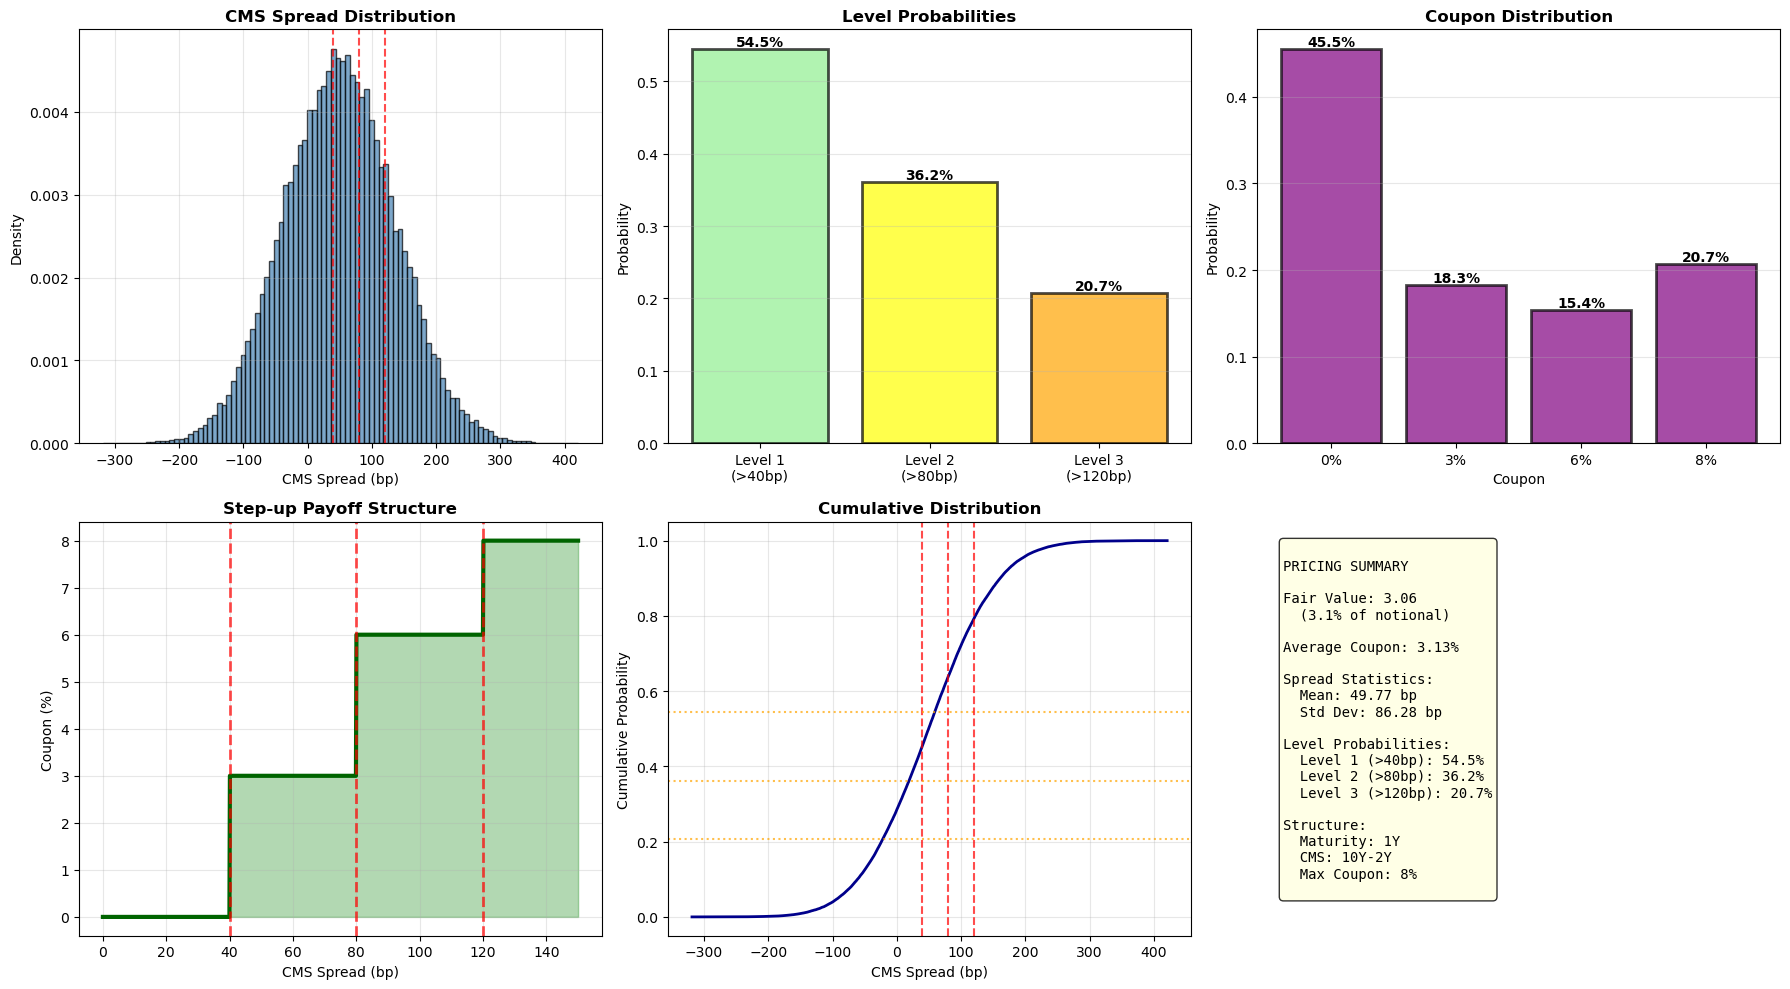


Î∂ÑÏÑù ÏôÑÎ£å!


In [6]:
import numpy as np
from math import exp, log, sqrt
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import csv

DEBUG_MODE = False

# =============================================================================
# 0. SETUP - ÏãúÏû• Îç∞Ïù¥ÌÑ∞ Î∞è ÌååÎùºÎØ∏ÌÑ∞ Î°úÎìú
# =============================================================================
def load_calibrated_params(filename="g2pp_calibrated_params_fast.csv"):
    """Î≥¥Ï†ïÎêú G2++ ÌååÎùºÎØ∏ÌÑ∞Î•º CSVÏóêÏÑú Î°úÎìú"""
    params = {}
    try:
        with open(filename, 'r') as f:
            reader = csv.reader(f)
            next(reader)
            for row in reader:
                if row[0] in ['a', 'b', 'sigma', 'eta', 'rho']:
                    params[row[0]] = float(row[1])
        print(f"‚úì Î≥¥Ï†ïÎêú ÌååÎùºÎØ∏ÌÑ∞Î•º '{filename}'ÏóêÏÑú Î°úÎìúÌñàÏäµÎãàÎã§.")
    except FileNotFoundError:
        print(f"‚ö† '{filename}' ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. Í∏∞Î≥∏Í∞íÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.")
        params = {
            'a': 0.065776, 'b': 0.484675, 'sigma': 0.014855,
            'eta': 0.016712, 'rho': 0.969087
        }
    return params

PAR_RATES_PCT = {
    1: 3.649, 2: 3.395, 3: 3.335, 5: 3.358, 7: 3.452,
    10: 3.607, 15: 3.810, 30: 3.863,
}

def fill_annual_par_curve_cubic(par_rates_pct):
    known = sorted((int(T), v / 100.0) for T, v in par_rates_pct.items())
    known_T, known_S = [kv[0] for kv in known], [kv[1] for kv in known]
    maxT = known_T[-1]
    spline = CubicSpline(known_T, known_S, bc_type='natural')
    return dict(zip(range(1, maxT + 1), spline(range(1, maxT + 1))))

def make_coupon_times(T, freq):
    delta = 1.0 / freq
    return [i * delta for i in range(1, int(round(T * freq)) + 1)], delta

def get_P_interpolator(P_year):
    known_points = sorted([(0, 1.0)] + list(P_year.items()))
    if len(known_points) < 2:
        return P_year.get
    known_T = [p[0] for p in known_points]
    known_lnP = [log(p[1]) for p in known_points]
    spline = CubicSpline(known_T, known_lnP, bc_type='natural')
    return lambda t: exp(spline(t))

def bootstrap_discounts_from_par(par_rates_dec, freq=1):
    P_year = {}
    for T in sorted(par_rates_dec.keys()):
        S, (coupon_times, delta) = par_rates_dec[T], make_coupon_times(T, freq)
        P_interpolator = get_P_interpolator(P_year)
        known_sum = sum(P_interpolator(ti) for ti in coupon_times[:-1])
        P_T = (1.0 - S * delta * known_sum) / (1.0 + S * delta)
        P_year[T] = P_T
    return P_year

def create_continuous_zero_curve(P_year):
    maturities = np.array([0] + sorted(P_year.keys()))
    dfs = np.array([1.0] + [P_year[t] for t in sorted(P_year.keys())])
    zero_rates = -np.log(dfs) / (maturities + 1e-9)
    zero_rates[0] = zero_rates[1]
    return CubicSpline(maturities, zero_rates, bc_type='natural')

print("=" * 70)
print("CMS Ïä§ÌÖùÏóÖ Ïä§ÌîÑÎ†àÎìú ÎÖ∏Ìä∏ Í∞ÄÍ≤©Í≤∞Ï†ï (G2++)")
print("=" * 70)
print("\n[Ï¥àÍ∏∞Ìôî] ÏãúÏû• Í≥°ÏÑ† Î∞è ÌååÎùºÎØ∏ÌÑ∞ Î°úÎìú Ï§ë...")

par_full = fill_annual_par_curve_cubic(PAR_RATES_PCT)
P_year = bootstrap_discounts_from_par(par_full, freq=1)
continuous_zero_curve = create_continuous_zero_curve(P_year)
P_market_func = lambda t: exp(-continuous_zero_curve(t) * t)

calibrated_params = load_calibrated_params()
print(f"\nÏÇ¨Ïö© Ï§ëÏù∏ G2++ ÌååÎùºÎØ∏ÌÑ∞:")
for k, v in calibrated_params.items():
    print(f"  {k}: {v:.6f}")

# =============================================================================
# œÜ(t) Ìï®Ïàò ÏÉùÏÑ±
# =============================================================================
def make_lnP_spline(P_year: dict):
    Ts = [0.0] + sorted(float(T) for T in P_year.keys())
    lnPs = [0.0] + [log(P_year[int(T)]) for T in sorted(P_year.keys())]
    spline_lnP = CubicSpline(Ts, lnPs, bc_type="natural")
    spline_dlnP = spline_lnP.derivative()

    def f0(t: float) -> float:
        if t < 1e-9:
            return -float(spline_dlnP(1e-6))
        return -float(spline_dlnP(t))
    return spline_lnP, f0

def phi_g2pp_factory(P_year: dict, a: float, b: float, sigma: float, eta: float, rho: float):
    _, f0 = make_lnP_spline(P_year)

    def phi(t: float) -> float:
        if t < 1e-9:
            t = 1e-9
        ea, eb = exp(-a*t), exp(-b*t)
        term_x = (sigma**2)/(2*a**2) * (1.0 - ea)**2
        term_y = (eta**2)/(2*b**2) * (1.0 - eb)**2
        cross = (rho*sigma*eta)/(a*b) * (1.0 - ea) * (1.0 - eb)
        return f0(t) + term_x + term_y + cross

    return phi, f0

phi_function, f0_function = phi_g2pp_factory(
    P_year,
    calibrated_params['a'], calibrated_params['b'],
    calibrated_params['sigma'], calibrated_params['eta'],
    calibrated_params['rho']
)

# =============================================================================
# G2++ ÌïµÏã¨ Ìï®ÏàòÎì§
# =============================================================================
def calculate_V(t, T, params):
    a, b, sigma, eta, rho = params['a'], params['b'], params['sigma'], params['eta'], params['rho']
    T_m_t = T - t
    if abs(a) < 1e-9 or abs(b) < 1e-9:
        return 0.0
    term1 = (sigma**2/a**2) * (T_m_t + (2/a)*np.exp(-a*T_m_t) - (1/(2*a))*np.exp(-2*a*T_m_t) - 3/(2*a))
    term2 = (eta**2/b**2) * (T_m_t + (2/b)*np.exp(-b*T_m_t) - (1/(2*b))*np.exp(-2*b*T_m_t) - 3/(2*b))
    term3 = (2*rho*sigma*eta/(a*b)) * (T_m_t + (np.exp(-a*T_m_t)-1)/a + (np.exp(-b*T_m_t)-1)/b - (np.exp(-(a+b)*T_m_t)-1)/(a+b))
    return term1 + term2 + term3

def B(z, t, T):
    if abs(z) < 1e-9:
        return T - t
    return (1 - np.exp(-z * (T - t))) / z

V_0_function = lambda t: calculate_V(0, t, calibrated_params)

# =============================================================================
# Î™¨ÌÖåÏπ¥Î•ºÎ°ú ÏãúÎÆ¨Î†àÏù¥ÏÖò
# =============================================================================
def simulate_g2_paths(params, T_expiry, num_paths, num_steps, phi_func):
    """G2++ Í≤ΩÎ°ú ÏãúÎÆ¨Î†àÏù¥ÏÖò"""
    a, b, sigma, eta, rho = params['a'], params['b'], params['sigma'], params['eta'], params['rho']
    dt = T_expiry / num_steps

    x = np.zeros(num_paths)
    y = np.zeros(num_paths)
    integ_r = np.zeros(num_paths)

    t = 0.0
    for step in range(num_steps):
        if (step + 1) % (num_steps // 10) == 0:
            progress = int((step + 1) / num_steps * 100)
            print(f"  Í≤ΩÎ°ú ÏÉùÏÑ±: {progress}%", end="\r")

        dw1 = np.random.normal(0, sqrt(dt), num_paths)
        dw2_indep = np.random.normal(0, sqrt(dt), num_paths)
        dw2 = rho * dw1 + sqrt(1 - rho**2) * dw2_indep

        x += -a * x * dt + sigma * dw1
        y += -b * y * dt + eta * dw2

        t += dt
        phi_t = phi_func(t)
        r_t = x + y + phi_t
        integ_r += r_t * dt

    print("  Í≤ΩÎ°ú ÏÉùÏÑ±: 100% - ÏôÑÎ£å!")

    D_paths = np.exp(-integ_r)
    return x, y, D_paths

# =============================================================================
# ÏÑ†ÎèÑ Ïä§Ïôë Í∏àÎ¶¨ Í≥ÑÏÇ∞
# =============================================================================
def calculate_forward_swap_rate(t_future, tenor, x_t, y_t, params, P_market, V_0_func):
    """ÏÑ†ÎèÑ Ïä§Ïôë Í∏àÎ¶¨ Í≥ÑÏÇ∞"""
    a, b = params['a'], params['b']

    swap_start = t_future
    swap_end = t_future + tenor
    payment_times = np.arange(swap_start + 0.5, swap_end + 0.01, 0.5)

    def get_future_P(T_maturity):
        try:
            P_0_T = P_market(T_maturity)
            P_0_t = P_market(t_future)
            V_t_T = calculate_V(t_future, T_maturity, params)
            V_0_T = V_0_func(T_maturity)
            V_0_t = V_0_func(t_future)
            A_t_T = (P_0_T / P_0_t) * exp(0.5 * (V_t_T - V_0_T + V_0_t))
            B_a_t_T = B(a, t_future, T_maturity)
            B_b_t_T = B(b, t_future, T_maturity)
            P_t_T = A_t_T * exp(-B_a_t_T * x_t - B_b_t_T * y_t)
            return P_t_T
        except (OverflowError, ValueError):
            return 0.0

    annuity = sum(0.5 * get_future_P(T_pay) for T_pay in payment_times)
    floating_pv = get_future_P(swap_start) - get_future_P(swap_end)

    if annuity == 0:
        return 0.0

    return floating_pv / annuity


# =============================================================================
# Step-up ÌéòÏù¥Ïò§ÌîÑ Í≥ÑÏÇ∞ (NEW)
# =============================================================================
def calculate_stepup_coupon(spread_bp, strikes_bp, step_coupons):
    """
    Step-up Ïø†Ìè∞ Í≥ÑÏÇ∞

    Args:
        spread_bp: CMS spread (bp)
        strikes_bp: [40, 80, 120] (bp)
        step_coupons: [0.02, 0.02, 0.02] (Í∞Å Îã®Í≥ÑÎ≥Ñ Ï∂îÍ∞Ä Ïø†Ìè∞)

    Returns:
        Ï¥ù Ïø†Ìè∞ (0.00, 0.02, 0.04, 0.06)
    """
    total_coupon = 0.0

    for strike_bp, coupon in zip(strikes_bp, step_coupons):
        if spread_bp > strike_bp:
            total_coupon += coupon

    return total_coupon


# =============================================================================
# Ïä§ÌÖùÏóÖ CMS Ïä§ÌîÑÎ†àÎìú ÎÖ∏Ìä∏ Í∞ÄÍ≤©Í≤∞Ï†ï (MODIFIED)
# =============================================================================
def price_stepup_cms_spread_mcs(params, product_details, P_market, V_0_func,
                                phi_func, num_paths=10000):
    """
    Ïä§ÌÖùÏóÖ CMS Ïä§ÌîÑÎ†àÎìú ÎÖ∏Ìä∏ Í∞ÄÍ≤©Í≤∞Ï†ï
    """
    T_expiry, tenor_long, tenor_short, strikes_bp, step_coupons, notional = product_details

    print(f"\n[ÏãúÎÆ¨Î†àÏù¥ÏÖò ÏãúÏûë]")
    print(f"  T={T_expiry}y, CMS={tenor_long}Y-{tenor_short}Y")
    print(f"  Step-up Íµ¨Ï°∞:")
    cumulative_coupon = 0.0
    for i, (strike, coupon) in enumerate(zip(strikes_bp, step_coupons)):
        cumulative_coupon += coupon
        print(f"    Level {i+1}: Spread > {strike}bp ‚Üí {coupon*100:.0f}% (ÎàÑÏ†Å: {cumulative_coupon*100:.0f}%)")
    print(f"  Í≤ΩÎ°ú Ïàò: {num_paths:,}")

    num_steps = max(int(T_expiry * 252), 100)

    # Í≤ΩÎ°ú ÏÉùÏÑ±
    x_T, y_T, D_paths = simulate_g2_paths(params, T_expiry, num_paths, num_steps, phi_func)

    # D_paths Í≤ÄÏ¶ù
    df_T = P_market(T_expiry)
    mean_D = np.mean(D_paths)
    error_pct = abs(mean_D - df_T) / df_T * 100

    print(f"\n[Ìï†Ïù∏Í≥ÑÏàò Í≤ÄÏ¶ù]")
    print(f"  E[D_T] = {mean_D:.6f}")
    print(f"  P(0,T) = {df_T:.6f}")
    print(f"  Ïò§Ï∞®: {error_pct:.3f}%")

    if error_pct > 5.0:
        print(f"  ‚ö† Í≤ΩÍ≥†: Ïò§Ï∞®Í∞Ä 5%Î•º Ï¥àÍ≥ºÌï©ÎãàÎã§.")
    elif error_pct > 1.0:
        print(f"  ‚ö† Ï£ºÏùò: Ïò§Ï∞®Í∞Ä 1%Î•º Ï¥àÍ≥ºÌï©ÎãàÎã§.")
    else:
        print(f"  ‚úì Í≤ÄÏ¶ù ÌÜµÍ≥º")

    # Ïä§ÌîÑÎ†àÎìú Í≥ÑÏÇ∞
    print(f"\n[CMS Ïä§ÌîÑÎ†àÎìú Í≥ÑÏÇ∞ Ï§ë...]")
    simulated_spreads = np.zeros(num_paths)

    for i in range(num_paths):
        if (i + 1) % (num_paths // 10) == 0:
            progress = int((i + 1) / num_paths * 100)
            print(f"  ÏßÑÌñâÎ•†: {progress}%", end="\r")

        rate_long = calculate_forward_swap_rate(T_expiry, tenor_long, x_T[i], y_T[i],
                                               params, P_market, V_0_func)
        rate_short = calculate_forward_swap_rate(T_expiry, tenor_short, x_T[i], y_T[i],
                                                params, P_market, V_0_func)
        simulated_spreads[i] = rate_long - rate_short

    print("  ÏßÑÌñâÎ•†: 100% - ÏôÑÎ£å!")

    # Step-up ÌéòÏù¥Ïò§ÌîÑ Í≥ÑÏÇ∞ (MODIFIED)
    payoffs = np.array([
        calculate_stepup_coupon(s * 10000, strikes_bp, step_coupons)
        for s in simulated_spreads
    ])

    # Í∞ÄÍ≤©
    price_per_unit = float(np.mean(D_paths * payoffs))
    price = price_per_unit * notional

    # ÌÜµÍ≥Ñ
    spread_mean_bp = np.mean(simulated_spreads) * 10000
    spread_std_bp = np.std(simulated_spreads) * 10000

    # Í∞Å Î†àÎ≤® ÎèÑÎã¨ ÌôïÎ•†
    level_probs = []
    for strike_bp in strikes_bp:
        prob = np.mean(simulated_spreads * 10000 > strike_bp)
        level_probs.append(prob)

    # ÌèâÍ∑† Ïø†Ìè∞
    avg_coupon = np.mean(payoffs)

    stats = {
        "mean_D": mean_D,
        "df_T": df_T,
        "spread_mean_bp": spread_mean_bp,
        "spread_std_bp": spread_std_bp,
        "level_probs": level_probs,
        "avg_coupon": avg_coupon,
        "payoff_distribution": payoffs
    }

    print(f"\n[Í≤∞Í≥º ÏöîÏïΩ]")
    print(f"  ÌèâÍ∑† Ïä§ÌîÑÎ†àÎìú: {spread_mean_bp:.2f} bp (œÉ={spread_std_bp:.2f} bp)")
    print(f"  Î†àÎ≤®Î≥Ñ ÎèÑÎã¨ ÌôïÎ•†:")
    for i, (strike, prob) in enumerate(zip(strikes_bp, level_probs)):
        print(f"    Level {i+1} (>{strike}bp): {prob:.2%}")
    print(f"  ÌèâÍ∑† Ïø†Ìè∞: {avg_coupon*100:.2f}%")

    return price, simulated_spreads, D_paths, payoffs, stats


# =============================================================================
# Ïã§Ìñâ
# =============================================================================
if __name__ == "__main__":
    # ÏÉÅÌíà Ïä§Ìéô (MODIFIED)
    product = {
        'expiry': 1,
        'tenor_long': 10.0,
        'tenor_short': 2.0,
        'strikes_bp': [40, 80, 120],      # Step-up strikes (bp)
        'step_coupons': [0.03, 0.03, 0.02],  # Í∞Å Î†àÎ≤®Î≥Ñ Ï∂îÍ∞Ä Ïø†Ìè∞
        'notional': 100
    }

    print("\n" + "=" * 70)
    print("ÏÉÅÌíà Ïä§Ìéô - Step-up CMS Spread Note")
    print("=" * 70)
    print(f"ÎßåÍ∏∞: {product['expiry']}ÎÖÑ")
    print(f"CMS: {product['tenor_long']:.0f}Y - {product['tenor_short']:.0f}Y")
    print(f"Step-up Íµ¨Ï°∞:")
    cumulative = 0.0
    for i, (strike, coupon) in enumerate(zip(product['strikes_bp'], product['step_coupons'])):
        cumulative += coupon
        print(f"  Level {i+1}: Spread > {strike}bp ‚Üí +{coupon*100:.0f}% (ÎàÑÏ†Å {cumulative*100:.0f}%)")
    print(f"Notional: {product['notional']}")

    # Í∞ÄÍ≤© Í≥ÑÏÇ∞
    final_price, spreads, D_paths, payoffs, stats = price_stepup_cms_spread_mcs(
        calibrated_params,
        (product['expiry'], product['tenor_long'], product['tenor_short'],
         product['strikes_bp'], product['step_coupons'], product['notional']),
        P_market_func,
        V_0_function,
        phi_func=phi_function,
        num_paths=50000
    )

    # ÏµúÏ¢Ö Í≤∞Í≥º
    print("\n" + "=" * 70)
    print("ÏµúÏ¢Ö Í∞ÄÍ≤©")
    print("=" * 70)
    print(f"ÌòÑÏû¨Í∞ÄÏπò: {final_price:.2f}")
    print(f"Ïï°Î©¥Í∞Ä ÎåÄÎπÑ: {final_price/product['notional']*100:.2f}%")
    print(f"ÌèâÍ∑† Ïø†Ìè∞: {stats['avg_coupon']*100:.2f}%")

    # ÏãúÍ∞ÅÌôî
    print("\n[Í∑∏ÎûòÌîÑ ÏÉùÏÑ± Ï§ë...]")
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    # 1) CMS Ïä§ÌîÑÎ†àÎìú Î∂ÑÌè¨
    ax1 = axes[0, 0]
    ax1.hist(spreads * 10000, bins=100, density=True, alpha=0.7,
             color='steelblue', edgecolor='black')
    for strike in product['strikes_bp']:
        ax1.axvline(strike, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
    ax1.set_title(f"CMS Spread Distribution", fontsize=12, fontweight='bold')
    ax1.set_xlabel("CMS Spread (bp)")
    ax1.set_ylabel("Density")
    ax1.grid(True, alpha=0.3)

    # 2) Î†àÎ≤®Î≥Ñ ÎèÑÎã¨ ÌôïÎ•†
    ax2 = axes[0, 1]
    levels = [f"Level {i+1}\n(>{s}bp)" for i, s in enumerate(product['strikes_bp'])]
    probs = stats['level_probs']
    colors = ['lightgreen', 'yellow', 'orange']
    bars = ax2.bar(levels, probs, color=colors, alpha=0.7, edgecolor='black', linewidth=2)

    for bar, prob in zip(bars, probs):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{prob:.1%}', ha='center', va='bottom', fontweight='bold')

    ax2.set_title("Level Probabilities", fontsize=12, fontweight='bold')
    ax2.set_ylabel("Probability")
    ax2.grid(True, alpha=0.3, axis='y')

    # 3) Ïø†Ìè∞ Î∂ÑÌè¨
    ax3 = axes[0, 2]
    unique_coupons = sorted(set(payoffs))
    coupon_counts = [np.sum(payoffs == c) for c in unique_coupons]
    coupon_probs = [count / len(payoffs) for count in coupon_counts]

    bars3 = ax3.bar([f"{c*100:.0f}%" for c in unique_coupons], coupon_probs,
                    color='purple', alpha=0.7, edgecolor='black', linewidth=2)

    for bar, prob in zip(bars3, coupon_probs):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'{prob:.1%}', ha='center', va='bottom', fontweight='bold')

    ax3.set_title("Coupon Distribution", fontsize=12, fontweight='bold')
    ax3.set_xlabel("Coupon")
    ax3.set_ylabel("Probability")
    ax3.grid(True, alpha=0.3, axis='y')

    # 4) Step-up ÌéòÏù¥Ïò§ÌîÑ Íµ¨Ï°∞
    ax4 = axes[1, 0]
    spread_range = np.linspace(0, 150, 1000)
    payoff_range = [calculate_stepup_coupon(s, product['strikes_bp'],
                                            product['step_coupons']) * 100
                   for s in spread_range]

    ax4.plot(spread_range, payoff_range, linewidth=3, color='darkgreen')
    ax4.fill_between(spread_range, 0, payoff_range, alpha=0.3, color='green')

    for strike in product['strikes_bp']:
        ax4.axvline(strike, color='red', linestyle='--', linewidth=2, alpha=0.7)

    ax4.set_title("Step-up Payoff Structure", fontsize=12, fontweight='bold')
    ax4.set_xlabel("CMS Spread (bp)")
    ax4.set_ylabel("Coupon (%)")
    ax4.grid(True, alpha=0.3)

    # 5) ÎàÑÏ†Å Î∂ÑÌè¨ Ìï®Ïàò (CDF)
    ax5 = axes[1, 1]
    sorted_spreads = np.sort(spreads * 10000)
    cumulative = np.arange(1, len(sorted_spreads) + 1) / len(sorted_spreads)
    ax5.plot(sorted_spreads, cumulative, linewidth=2, color='darkblue')

    for i, strike in enumerate(product['strikes_bp']):
        ax5.axvline(strike, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
        ax5.axhline(stats['level_probs'][i], color='orange', linestyle=':',
                   linewidth=1.5, alpha=0.7)

    ax5.set_title("Cumulative Distribution", fontsize=12, fontweight='bold')
    ax5.set_xlabel("CMS Spread (bp)")
    ax5.set_ylabel("Cumulative Probability")
    ax5.grid(True, alpha=0.3)

    # 6) ÏöîÏïΩ ÌÜµÍ≥Ñ
    ax6 = axes[1, 2]
    ax6.axis('off')

    summary_text = f"""
PRICING SUMMARY

Fair Value: {final_price:.2f}
  ({final_price/product['notional']*100:.1f}% of notional)

Average Coupon: {stats['avg_coupon']*100:.2f}%

Spread Statistics:
  Mean: {stats['spread_mean_bp']:.2f} bp
  Std Dev: {stats['spread_std_bp']:.2f} bp

Level Probabilities:
  Level 1 (>{product['strikes_bp'][0]}bp): {stats['level_probs'][0]:.1%}
  Level 2 (>{product['strikes_bp'][1]}bp): {stats['level_probs'][1]:.1%}
  Level 3 (>{product['strikes_bp'][2]}bp): {stats['level_probs'][2]:.1%}

Structure:
  Maturity: {product['expiry']}Y
  CMS: {product['tenor_long']:.0f}Y-{product['tenor_short']:.0f}Y
  Max Coupon: {sum(product['step_coupons'])*100:.0f}%
"""

    ax6.text(0.05, 0.95, summary_text, transform=ax6.transAxes,
             fontsize=10, verticalalignment='top', family='monospace',
             bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

    plt.tight_layout()
    plt.savefig('cms_stepup_note_analysis.png', dpi=300, bbox_inches='tight')
    print("‚úì Í∑∏ÎûòÌîÑ Ï†ÄÏû• ÏôÑÎ£å: cms_stepup_note_analysis.png")
    plt.show()

    print("\n" + "=" * 70)
    print("Î∂ÑÏÑù ÏôÑÎ£å!")
    print("=" * 70)

# Îç∏ÌÉÄ & Í∞êÎßà ÎèôÏ†Å Ìó∑Ïßï


CMS Step-up: Îç∏ÌÉÄ + Í∞êÎßà ÎèôÏ†Å Ìó§Ïßï Î∂ÑÏÑù

ÏÉÅÌíà Ï†ïÎ≥¥:
  ÎßåÍ∏∞: 1Y
  CMS: 10Y - 2Y
  Strikes: [40, 80, 120]bp
  Notional: 100

Ìó§Ïßï Ï†ïÏ±Ö:
  Îç∏ÌÉÄ Ìó§Ïßï:
    - Ï£ºÍ∏∞: 5ÏòÅÏóÖÏùº (Ï£ºÍ∞Ñ)
    - ÎπÑÏö©: 1.5bp/Í±∞Îûò
  Í∞êÎßà Ìó§Ïßï:
    - Zone width: ¬±7.0bp
    - ÎπÑÏö©: 2.0bp/Í±∞Îûò
    - Î¶¨Î∞∏Îü∞Ïã±: Îç∏ÌÉÄ Î≥ÄÌôî 30.0% Ïù¥ÏÉÅ
    - ÏµúÏÜå Í∞ÑÍ≤©: 3ÏòÅÏóÖÏùº

[G2++ ÏãúÎÆ¨Î†àÏù¥ÏÖò]
  Ï†ÑÏ≤¥ Í≤ΩÎ°ú ÏÉùÏÑ± Ï§ë... (paths=10000, steps=252)
    100% ÏôÑÎ£å!

Îç∏ÌÉÄ + Í∞êÎßà ÎèôÏ†Å Ìó§Ïßï ÏãúÎÆ¨Î†àÏù¥ÏÖò

Ìó§Ïßï Ï†ïÏ±Ö:
  Îç∏ÌÉÄ Ìó§Ïßï: 5ÏùºÎßàÎã§ (Ï£ºÍ∞Ñ)
  Í∞êÎßà Ìó§Ïßï:
    - Zone ÏßÑÏûÖ/Ïù¥ÌÉà: Ï¶âÏãú
    - Zone ÎÇ¥Î∂Ä: Îç∏ÌÉÄ Î≥ÄÌôî 30.0% Ïù¥ÏÉÅ
    - ÏµúÏÜå Í∞ÑÍ≤©: 3Ïùº

DV01 Ï∂îÏ†ï:
  10Y CMS: 1667.1466
  2Y CMS: 382.6282

Zone Ï†ïÏùò (width = ¬±7.0bp):
  Zone 1: [33bp, 47bp] (Ï§ëÏã¨: 40bp)
  Zone 2: [73bp, 87bp] (Ï§ëÏã¨: 80bp)
  Zone 3: [113bp, 127bp] (Ï§ëÏã¨: 120bp)

Í≤ΩÎ°ú Î∂ÑÏÑù Ï§ë... (Ï¥ù 10,000Í∞ú Í≤ΩÎ°ú)
  ÏßÑÌñâÎ•†: 100% ÏôÑÎ£å!

Ìó§Ïßï Í≤∞Í≥º

Îç∏ÌÉÄ Ìó§

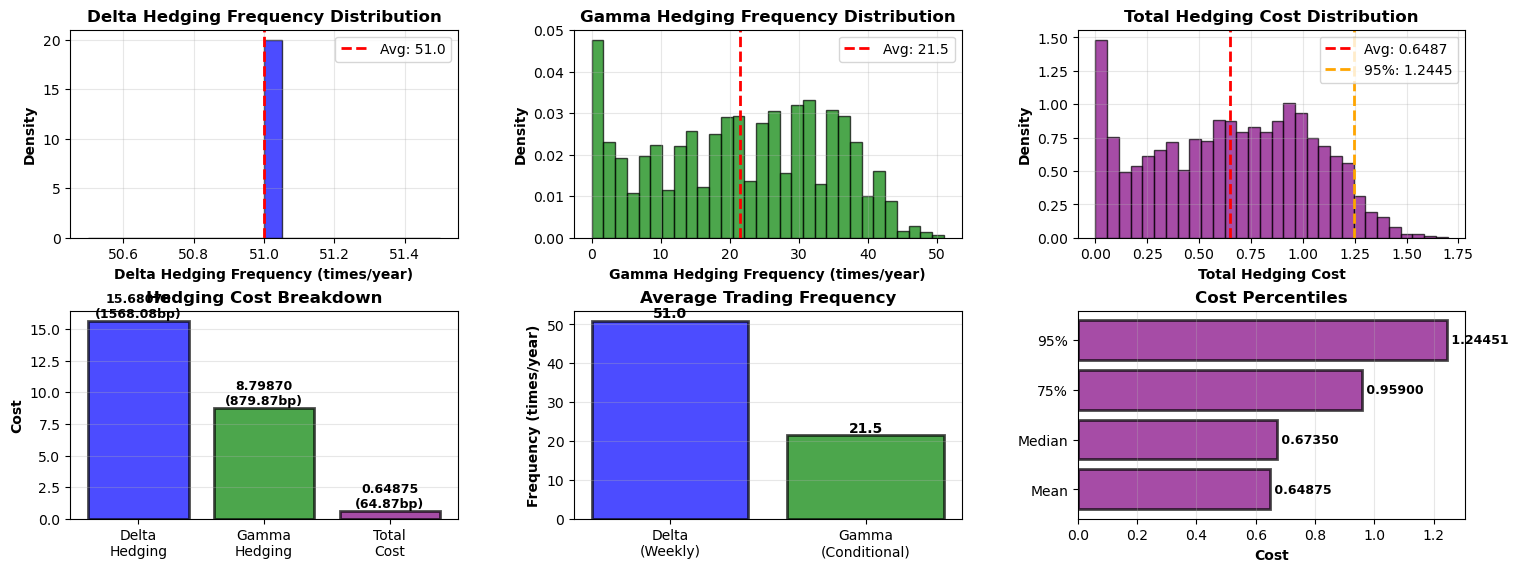


Î∂ÑÏÑù ÏôÑÎ£å!

ÏµúÏ¢Ö Í∂åÏû•ÏÇ¨Ìï≠:
  ‚Ä¢ Îç∏ÌÉÄ Ìó§Ïßï: Ï£ºÍ∞Ñ Î¶¨Î∞∏Îü∞Ïã± (51Ìöå/ÎÖÑ)
  ‚Ä¢ Í∞êÎßà Ìó§Ïßï: Ï°∞Í±¥Î∂Ä (21Ìöå/ÎÖÑ)
  ‚Ä¢ ÌèâÍ∑† Ï¥ù ÎπÑÏö©: 0.648746 (64.875bp)
  ‚Ä¢ Í∞ÄÍ≤© Î∞òÏòÅ: 1.244506 (124.451bp) ÏÇ¨Ïö© Í∂åÏû•

ÎØºÍ∞êÎèÑ Î∂ÑÏÑù Ï†úÏïà:
  ‚Ä¢ Zone width Î≥ÄÍ≤Ω: 5bp ‚Üí 3bp, 7bp, 10bp
  ‚Ä¢ Îç∏ÌÉÄ Ï£ºÍ∏∞ Î≥ÄÍ≤Ω: 5Ïùº ‚Üí 3Ïùº, 7Ïùº, 10Ïùº
  ‚Ä¢ Í∞êÎßà ÏûÑÍ≥ÑÍ∞í Î≥ÄÍ≤Ω: 30% ‚Üí 20%, 40%, 50%
  ‚Ä¢ ÏµúÏÜå Í∞ÑÍ≤© Î≥ÄÍ≤Ω: 3Ïùº ‚Üí 1Ïùº, 5Ïùº, 7Ïùº


In [9]:
import numpy as np
from math import exp, log, sqrt
from scipy.interpolate import CubicSpline
import matplotlib
import matplotlib.pyplot as plt
import csv
import platform

# MatplotlibÏùò Î™®Îì† ÏÑ§Ï†ïÏùÑ Í∏∞Î≥∏Í∞íÏúºÎ°ú Ï¥àÍ∏∞ÌôîÌïòÏó¨ Ïô∏Î∂Ä ÏÑ§Ï†ïÏùò ÏòÅÌñ•ÏùÑ Î∞õÏßÄ ÏïäÎèÑÎ°ù Ìï©ÎãàÎã§.
# Ïù¥ ÏΩîÎìúÍ∞Ä 'NanumGothic' not found Í≤ΩÍ≥†Î•º ÏõêÏ≤úÏ†ÅÏúºÎ°ú Î∞©ÏßÄÌï©ÎãàÎã§.
matplotlib.rcdefaults()

# =============================================================================
# SETUP (Ïù¥Ï†Ñ ÏΩîÎìúÏôÄ ÎèôÏùº)
# =============================================================================
def load_calibrated_params(filename="g2pp_calibrated_params_fast.csv"):
    params = {}
    try:
        with open(filename, 'r') as f:
            reader = csv.reader(f)
            next(reader)
            for row in reader:
                if row[0] in ['a', 'b', 'sigma', 'eta', 'rho']:
                    params[row[0]] = float(row[1])
    except FileNotFoundError:
        params = {'a': 0.024749, 'b': 0.461650, 'sigma': 0.010600,
                  'eta': 0.023271, 'rho': 0.624061}
    return params

PAR_RATES_PCT = {1: 3.649, 2: 3.395, 3: 3.335, 5: 3.358, 7: 3.452,
                 10: 3.607, 15: 3.810, 30: 3.863}

def fill_annual_par_curve_cubic(par_rates_pct):
    known = sorted((int(T), v / 100.0) for T, v in par_rates_pct.items())
    known_T, known_S = [kv[0] for kv in known], [kv[1] for kv in known]
    maxT = known_T[-1]
    spline = CubicSpline(known_T, known_S, bc_type='natural')
    return dict(zip(range(1, maxT + 1), spline(range(1, maxT + 1))))

def make_coupon_times(T, freq):
    delta = 1.0 / freq
    return [i * delta for i in range(1, int(round(T * freq)) + 1)], delta

def get_P_interpolator(P_year):
    known_points = sorted([(0, 1.0)] + list(P_year.items()))
    if len(known_points) < 2:
        return P_year.get
    known_T = [p[0] for p in known_points]
    known_lnP = [log(p[1]) for p in known_points]
    spline = CubicSpline(known_T, known_lnP, bc_type='natural')
    return lambda t: exp(spline(t))

def bootstrap_discounts_from_par(par_rates_dec, freq=1):
    P_year = {}
    for T in sorted(par_rates_dec.keys()):
        S, (coupon_times, delta) = par_rates_dec[T], make_coupon_times(T, freq)
        P_interpolator = get_P_interpolator(P_year)
        known_sum = sum(P_interpolator(ti) for ti in coupon_times[:-1])
        P_T = (1.0 - S * delta * known_sum) / (1.0 + S * delta)
        P_year[T] = P_T
    return P_year

def create_continuous_zero_curve(P_year):
    maturities = np.array([0] + sorted(P_year.keys()))
    dfs = np.array([1.0] + [P_year[t] for t in sorted(P_year.keys())])
    zero_rates = -np.log(dfs) / (maturities + 1e-9)
    zero_rates[0] = zero_rates[1]
    return CubicSpline(maturities, zero_rates, bc_type='natural')

def make_lnP_spline(P_year):
    Ts = [0.0] + sorted(float(T) for T in P_year.keys())
    lnPs = [0.0] + [log(P_year[int(T)]) for T in sorted(P_year.keys())]
    spline_lnP = CubicSpline(Ts, lnPs, bc_type="natural")
    spline_dlnP = spline_lnP.derivative()
    def f0(t):
        if t < 1e-9:
            return -float(spline_dlnP(1e-6))
        return -float(spline_dlnP(t))
    return spline_lnP, f0

def phi_g2pp_factory(P_year, a, b, sigma, eta, rho):
    _, f0 = make_lnP_spline(P_year)
    def phi(t):
        if t < 1e-9:
            t = 1e-9
        ea, eb = exp(-a*t), exp(-b*t)
        term_x = (sigma**2)/(2*a**2) * (1.0 - ea)**2
        term_y = (eta**2)/(2*b**2) * (1.0 - eb)**2
        cross = (rho*sigma*eta)/(a*b) * (1.0 - ea) * (1.0 - eb)
        return f0(t) + term_x + term_y + cross
    return phi, f0

def calculate_V(t, T, params):
    a, b, sigma, eta, rho = params['a'], params['b'], params['sigma'], params['eta'], params['rho']
    T_m_t = T - t
    if abs(a) < 1e-9 or abs(b) < 1e-9:
        return 0.0
    term1 = (sigma**2/a**2) * (T_m_t + (2/a)*np.exp(-a*T_m_t) - (1/(2*a))*np.exp(-2*a*T_m_t) - 3/(2*a))
    term2 = (eta**2/b**2) * (T_m_t + (2/b)*np.exp(-b*T_m_t) - (1/(2*b))*np.exp(-2*b*T_m_t) - 3/(2*b))
    term3 = (2*rho*sigma*eta/(a*b)) * (T_m_t + (np.exp(-a*T_m_t)-1)/a + (np.exp(-b*T_m_t)-1)/b - (np.exp(-(a+b)*T_m_t)-1)/(a+b))
    return term1 + term2 + term3

def B(z, t, T):
    if abs(z) < 1e-9:
        return T - t
    return (1 - np.exp(-z * (T - t))) / z

def calculate_forward_swap_rate(t_future, tenor, x_t, y_t, params, P_market, V_0_func):
    a, b = params['a'], params['b']
    swap_start = t_future
    swap_end = t_future + tenor
    payment_times = np.arange(swap_start + 0.5, swap_end + 0.01, 0.5)
    
    def get_future_P(T_maturity):
        try:
            P_0_T = P_market(T_maturity)
            P_0_t = P_market(t_future)
            V_t_T = calculate_V(t_future, T_maturity, params)
            V_0_T = V_0_func(T_maturity)
            V_0_t = V_0_func(t_future)
            A_t_T = (P_0_T / P_0_t) * exp(0.5 * (V_t_T - V_0_T + V_0_t))
            B_a_t_T = B(a, t_future, T_maturity)
            B_b_t_T = B(b, t_future, T_maturity)
            P_t_T = A_t_T * exp(-B_a_t_T * x_t - B_b_t_T * y_t)
            return P_t_T
        except:
            return 0.0
    
    annuity = sum(0.5 * get_future_P(T_pay) for T_pay in payment_times)
    floating_pv = get_future_P(swap_start) - get_future_P(swap_end)
    if annuity == 0:
        return 0.0
    return floating_pv / annuity

# =============================================================================
# Îç∏ÌÉÄ Í≥ÑÏÇ∞ Ìï®Ïàò
# =============================================================================
def calculate_delta_at_point(spread_bp, strikes_bp, step_coupons, band_bp, notional):
    """
    ÌäπÏ†ï Ïä§ÌîÑÎ†àÎìúÏóêÏÑúÏùò Step-up Delta Í≥ÑÏÇ∞
    
    Delta = ‚àÇ(Payoff) / ‚àÇ(Spread)
    """
    total_delta = 0.0
    
    for strike, coupon in zip(strikes_bp, step_coupons):
        # Strike Í∑ºÏ≤òÏóêÏÑúÎßå Îç∏ÌÉÄÍ∞Ä Ï°¥Ïû¨
        distance = abs(spread_bp - strike)
        
        if distance < band_bp:
            # Zone ÎÇ¥Î∂Ä: Îç∏ÌÉÄÍ∞Ä ÏÑ†ÌòïÏ†ÅÏúºÎ°ú Î≥ÄÌôî
            # ÏµúÎåÄ Îç∏ÌÉÄ = coupon * notional / (2 * band_bp)
            max_delta = (coupon * notional) / (2 * band_bp)
            
            # Strike ÏúÑ/ÏïÑÎûòÏóê Îî∞Îùº Î∂ÄÌò∏ Í≤∞Ï†ï
            if spread_bp > strike:
                # Strike ÏúÑ: ÏñëÏùò Îç∏ÌÉÄ (spread Ï¶ùÍ∞Ä Ïãú payoff Ï¶ùÍ∞Ä)
                delta_contribution = max_delta * (1 - distance / band_bp)
            else:
                # Strike ÏïÑÎûò: ÏùåÏùò Îç∏ÌÉÄ
                delta_contribution = -max_delta * (1 - distance / band_bp)
            
            total_delta += delta_contribution
    
    return total_delta

# =============================================================================
# DV01 Ï∂îÏ†ï Ìï®Ïàò
# =============================================================================
def estimate_cms_dv01(tenor, notional_unit=1_000_000, current_rate=0.036):
    """CMS Swap DV01 Ï∂îÏ†ï (Í∞ÑÎã®Ìïú Í∑ºÏÇ¨)"""
    n = tenor * 2  # Î∞òÎÖÑ Îã®ÏúÑ
    r = current_rate / 2
    
    if r < 1e-9:
        mod_duration = n
    else:
        mod_duration = (1 - (1 + r)**(-n)) / r
    
    dv01 = mod_duration * notional_unit * 0.0001
    return dv01

def simulate_g2_paths_full_trajectory(params, T_expiry, num_paths, num_steps, phi_func, seed=None):
    if seed is not None:
        np.random.seed(seed)
    
    print(f"  Ï†ÑÏ≤¥ Í≤ΩÎ°ú ÏÉùÏÑ± Ï§ë... (paths={num_paths}, steps={num_steps})")
    
    a, b, sigma, eta, rho = params['a'], params['b'], params['sigma'], params['eta'], params['rho']
    dt = T_expiry / num_steps
    
    x_paths = np.zeros((num_paths, num_steps + 1))
    y_paths = np.zeros((num_paths, num_steps + 1))
    integ_r = np.zeros(num_paths)
    
    for step in range(num_steps):
        if (step + 1) % (num_steps // 10) == 0:
            print(f"    {(step+1)/num_steps*100:.0f}%", end='\r')
        
        dw1 = np.random.normal(0, sqrt(dt), num_paths)
        dw2_indep = np.random.normal(0, sqrt(dt), num_paths)
        dw2 = rho * dw1 + sqrt(1 - rho**2) * dw2_indep
        
        x_paths[:, step+1] = x_paths[:, step] - a * x_paths[:, step] * dt + sigma * dw1
        y_paths[:, step+1] = y_paths[:, step] - b * y_paths[:, step] * dt + eta * dw2
        
        t = (step + 1) * dt
        phi_t = phi_func(t)
        r_t = x_paths[:, step+1] + y_paths[:, step+1] + phi_t
        integ_r += r_t * dt
    
    print("    100% ÏôÑÎ£å!")
    
    D_paths = np.exp(-integ_r)
    return x_paths, y_paths, D_paths

def calculate_stepup_coupon(spread_bp, strikes_bp, step_coupons):
    """Step-up Ïø†Ìè∞ Í≥ÑÏÇ∞"""
    total_coupon = 0.0
    for strike_bp, coupon in zip(strikes_bp, step_coupons):
        if spread_bp > strike_bp:
            total_coupon += coupon
    return total_coupon

# =============================================================================
# Îç∏ÌÉÄ + Í∞êÎßà ÎèôÏ†Å Ìó§Ïßï ÏãúÎÆ¨Î†àÏù¥ÏÖò
# =============================================================================
def simulate_dynamic_hedging(x_paths, y_paths, params, product, hedging_policy, 
                             P_market, V_0_func):
    """
    Îç∏ÌÉÄ + Í∞êÎßà ÎèôÏ†Å Ìó§Ïßï ÏãúÎÆ¨Î†àÏù¥ÏÖò
    
    Îç∏ÌÉÄ Ìó§Ïßï: Ï£ºÍ∞Ñ (Îß§Ï£º Í∏àÏöîÏùº)
    Í∞êÎßà Ìó§Ïßï: Ï°∞Í±¥Î∂Ä
      1. Zone ÏßÑÏûÖ/Ïù¥ÌÉà Ïãú Ï¶âÏãú
      2. Zone ÎÇ¥ÏóêÏÑú Îç∏ÌÉÄ Î≥ÄÌôî 30% Ïù¥ÏÉÅ Ïãú
      3. ÏµúÏÜå 3Ïùº Í∞ÑÍ≤©
    """
    print(f"\n{'='*70}")
    print(f"Îç∏ÌÉÄ + Í∞êÎßà ÎèôÏ†Å Ìó§Ïßï ÏãúÎÆ¨Î†àÏù¥ÏÖò")
    print(f"{'='*70}")
    
    num_paths, num_steps_plus_one = x_paths.shape
    num_steps = num_steps_plus_one - 1
    T_expiry = product['expiry']
    dt = T_expiry / num_steps
    
    # Í±∞ÎûòÏùº Í∏∞Ï§Ä (1ÎÖÑ = 252Ïùº)
    trading_days_per_year = 252
    dt_days = T_expiry * trading_days_per_year / num_steps
    
    notional = product['notional']
    strikes_bp = product['strikes_bp']
    band_bp = hedging_policy['band_bp']
    
    # Í±∞Îûò ÎπÑÏö© (bid-ask spread)
    delta_cost_per_trade_bp = hedging_policy['delta_cost_bp']
    gamma_cost_per_trade_bp = hedging_policy['gamma_cost_bp']
    
    # Ìó§Ïßï Ï£ºÍ∏∞
    delta_rehedge_days = hedging_policy['delta_rehedge_days']  # 5 ÏòÅÏóÖÏùº (1Ï£º)
    gamma_min_days = hedging_policy['gamma_min_days']  # 3 ÏòÅÏóÖÏùº
    gamma_delta_threshold = hedging_policy['gamma_delta_threshold']  # 30%
    
    # DV01 Ï∂îÏ†ï (10YÏôÄ 2Y CMS)
    dv01_10y = estimate_cms_dv01(product['tenor_long'], notional_unit=1_000_000, current_rate=0.036)
    dv01_2y = estimate_cms_dv01(product['tenor_short'], notional_unit=1_000_000, current_rate=0.036)
    
    # Zone Ï†ïÏùò
    zones = []
    for strike in strikes_bp:
        zones.append({
            'strike': strike,
            'lower': strike - band_bp,
            'upper': strike + band_bp
        })
    
    print(f"\nÌó§Ïßï Ï†ïÏ±Ö:")
    print(f"  Îç∏ÌÉÄ Ìó§Ïßï: {delta_rehedge_days}ÏùºÎßàÎã§ (Ï£ºÍ∞Ñ)")
    print(f"  Í∞êÎßà Ìó§Ïßï:")
    print(f"    - Zone ÏßÑÏûÖ/Ïù¥ÌÉà: Ï¶âÏãú")
    print(f"    - Zone ÎÇ¥Î∂Ä: Îç∏ÌÉÄ Î≥ÄÌôî {gamma_delta_threshold}% Ïù¥ÏÉÅ")
    print(f"    - ÏµúÏÜå Í∞ÑÍ≤©: {gamma_min_days}Ïùº")
    
    print(f"\nDV01 Ï∂îÏ†ï:")
    print(f"  10Y CMS: {dv01_10y:.4f}")
    print(f"  2Y CMS: {dv01_2y:.4f}")
    
    print(f"\nZone Ï†ïÏùò (width = ¬±{band_bp}bp):")
    for i, zone in enumerate(zones):
        print(f"  Zone {i+1}: [{zone['lower']:.0f}bp, {zone['upper']:.0f}bp] (Ï§ëÏã¨: {zone['strike']}bp)")
    
    print(f"\nÍ≤ΩÎ°ú Î∂ÑÏÑù Ï§ë... (Ï¥ù {num_paths:,}Í∞ú Í≤ΩÎ°ú)")
    
    # ÏÉòÌîåÎßÅ (ÏÜçÎèÑÎ•º ÏúÑÌï¥)
    sample_size = min(num_paths, 5000)
    sample_indices = np.random.choice(num_paths, sample_size, replace=False)
    
    # Í≤∞Í≥º Ï†ÄÏû•
    delta_trades_per_path = []
    gamma_trades_per_path = []
    total_costs_per_path = []
    
    for idx, path_idx in enumerate(sample_indices):
        if (idx + 1) % (sample_size // 10) == 0:
            print(f"  ÏßÑÌñâÎ•†: {(idx+1)/sample_size*100:.0f}%", end='\r')
        
        delta_trades = 0
        gamma_trades = 0
        delta_cost_accumulated = 0.0
        gamma_cost_accumulated = 0.0
        
        # Îç∏ÌÉÄ Ï∂îÏ†Å
        last_delta_hedge_day = -999  # ÎßàÏßÄÎßâ Îç∏ÌÉÄ Ìó§Ïßï ÎÇ†Ïßú
        last_hedged_delta = 0.0  # ÎßàÏßÄÎßâÏúºÎ°ú Ìó§ÏßïÌïú Îç∏ÌÉÄ Í∞í
        
        # Í∞êÎßà Ï∂îÏ†Å (ZoneÎ≥Ñ)
        in_zone_prev = [False] * len(zones)
        last_gamma_hedge_day = [-999] * len(zones)
        last_delta_in_zone = [0.0] * len(zones)
        
        for step in range(num_steps + 1):
            t = step * dt
            current_day = step * dt_days
            
            x_t = x_paths[path_idx, step]
            y_t = y_paths[path_idx, step]
            
            # Ïä§ÌîÑÎ†àÎìú Í≥ÑÏÇ∞
            rate_10y = calculate_forward_swap_rate(
                t, product['tenor_long'], x_t, y_t, params, P_market, V_0_func
            )
            rate_2y = calculate_forward_swap_rate(
                t, product['tenor_short'], x_t, y_t, params, P_market, V_0_func
            )
            spread_bp = (rate_10y - rate_2y) * 10000
            
            # ÌòÑÏû¨ Îç∏ÌÉÄ Í≥ÑÏÇ∞ (Í∞ÑÎã®Ìïú Í∑ºÏÇ¨)
            current_delta = 0.0
            for zone in zones:
                if abs(spread_bp - zone['strike']) < band_bp:
                    # Zone Í∑ºÏ≤òÏóê ÏûàÏúºÎ©¥ Îç∏ÌÉÄ Í∏∞Ïó¨
                    coupon_diff = 0.01  # 1% Ïø†Ìè∞ Ï∞®Ïù¥
                    current_delta += coupon_diff * notional / (2 * band_bp)
            
            # === Îç∏ÌÉÄ Ìó§Ïßï ===
            if current_day - last_delta_hedge_day >= delta_rehedge_days:
                delta_trades += 1
                
                # Îç∏ÌÉÄ Î≥ÄÌôîÎüâ
                delta_change = abs(current_delta - last_hedged_delta)
                
                # Ìó§Ïßï Í∑úÎ™® = Îç∏ÌÉÄ Î≥ÄÌôîÎüâ
                # CMS swapÏúºÎ°ú Ìó§Ïßï
                hedge_notional = delta_change * (notional / 100) * 1_000_000
                
                # ÎπÑÏö© = Ìó§Ïßï Í∑úÎ™® √ó DV01 √ó bid-ask
                # Ïä§ÌîÑÎ†àÎìú Ìó§ÏßïÏù¥ÎØÄÎ°ú 10YÏôÄ 2Y Î™®Îëê Í≥†Î†§
                cost_10y = (hedge_notional / 1_000_000) * dv01_10y * (delta_cost_per_trade_bp / 10000)
                cost_2y = (hedge_notional / 1_000_000) * dv01_2y * (delta_cost_per_trade_bp / 10000)
                delta_cost_accumulated += (cost_10y + cost_2y)
                
                last_delta_hedge_day = current_day
                last_hedged_delta = current_delta
            
            # === Í∞êÎßà Ìó§Ïßï ===
            for zone_idx, zone in enumerate(zones):
                in_zone_now = (zone['lower'] <= spread_bp <= zone['upper'])
                days_since_last_gamma = current_day - last_gamma_hedge_day[zone_idx]
                
                # 1) Zone ÏßÑÏûÖ/Ïù¥ÌÉà
                if in_zone_now != in_zone_prev[zone_idx]:
                    if days_since_last_gamma >= gamma_min_days:
                        gamma_trades += 1
                        
                        # Îç∏ÌÉÄ Î≥ÄÌôîÎüâ
                        delta_change = abs(current_delta - last_delta_in_zone[zone_idx])
                        
                        # Ìè¨ÏßÄÏÖò Î≥ÄÌôîÎüâÏóê ÎπÑÎ°ÄÌïú ÎπÑÏö©
                        hedge_notional = delta_change * (notional / 100) * 1_000_000
                        
                        cost_10y = (hedge_notional / 1_000_000) * dv01_10y * (gamma_cost_per_trade_bp / 10000)
                        cost_2y = (hedge_notional / 1_000_000) * dv01_2y * (gamma_cost_per_trade_bp / 10000)
                        gamma_cost_accumulated += (cost_10y + cost_2y)
                        
                        last_gamma_hedge_day[zone_idx] = current_day
                        last_delta_in_zone[zone_idx] = current_delta
                
                # 2) Zone ÎÇ¥Î∂Ä Î¶¨Î∞∏Îü∞Ïã±
                elif in_zone_now:
                    if last_delta_in_zone[zone_idx] > 0:
                        delta_change_pct = abs(current_delta - last_delta_in_zone[zone_idx]) / last_delta_in_zone[zone_idx] * 100
                        
                        if delta_change_pct > gamma_delta_threshold and days_since_last_gamma >= gamma_min_days:
                            gamma_trades += 1
                            
                            # Îç∏ÌÉÄ Î≥ÄÌôîÎüâ
                            delta_change = abs(current_delta - last_delta_in_zone[zone_idx])
                            
                            # Ìè¨ÏßÄÏÖò Î≥ÄÌôîÎüâÏóê ÎπÑÎ°ÄÌïú ÎπÑÏö©
                            hedge_notional = delta_change * (notional / 100) * 1_000_000
                            
                            cost_10y = (hedge_notional / 1_000_000) * dv01_10y * (gamma_cost_per_trade_bp / 10000)
                            cost_2y = (hedge_notional / 1_000_000) * dv01_2y * (gamma_cost_per_trade_bp / 10000)
                            gamma_cost_accumulated += (cost_10y + cost_2y)
                            
                            last_gamma_hedge_day[zone_idx] = current_day
                            last_delta_in_zone[zone_idx] = current_delta
                
                in_zone_prev[zone_idx] = in_zone_now
        
        # Ï¥ù ÎπÑÏö©
        total_cost = delta_cost_accumulated + gamma_cost_accumulated
        
        delta_trades_per_path.append(delta_trades)
        gamma_trades_per_path.append(gamma_trades)
        total_costs_per_path.append(total_cost)
    
    print("  ÏßÑÌñâÎ•†: 100% ÏôÑÎ£å!")
    
    # ÌÜµÍ≥Ñ Í≥ÑÏÇ∞
    delta_trades_array = np.array(delta_trades_per_path)
    gamma_trades_array = np.array(gamma_trades_per_path)
    total_costs_array = np.array(total_costs_per_path)
    
    # ÌèâÍ∑† ÎπÑÏö© Ïû¨Í≥ÑÏÇ∞ (Í≤ΩÎ°úÎ≥Ñ Ïã§Ï†ú ÎπÑÏö© ÏÇ¨Ïö©)
    avg_delta_cost = np.mean([
        delta_trades_per_path[i] * (notional / 100) * 1_000_000 / 1_000_000 * 
        (dv01_10y + dv01_2y) * (delta_cost_per_trade_bp / 10000)
        for i in range(len(delta_trades_per_path))
    ])
    
    avg_gamma_cost = np.mean([
        gamma_trades_per_path[i] * (notional / 100) * 1_000_000 / 1_000_000 * 
        (dv01_10y + dv01_2y) * (gamma_cost_per_trade_bp / 10000)
        for i in range(len(gamma_trades_per_path))
    ])
    
    results = {
        'delta': {
            'avg_trades': np.mean(delta_trades_array),
            'median_trades': np.median(delta_trades_array),
            'std_trades': np.std(delta_trades_array),
            'avg_cost': avg_delta_cost,
        },
        'gamma': {
            'avg_trades': np.mean(gamma_trades_array),
            'median_trades': np.median(gamma_trades_array),
            'std_trades': np.std(gamma_trades_array),
            'avg_cost': avg_gamma_cost,
        },
        'total': {
            'avg_cost': np.mean(total_costs_array),
            'median_cost': np.median(total_costs_array),
            'std_cost': np.std(total_costs_array),
            'percentile_95': np.percentile(total_costs_array, 95),
        },
        'distributions': {
            'delta_trades': delta_trades_array,
            'gamma_trades': gamma_trades_array,
            'total_costs': total_costs_array,
        }
    }
    
    # Í≤∞Í≥º Ï∂úÎ†•
    print(f"\n{'='*70}")
    print(f"Ìó§Ïßï Í≤∞Í≥º")
    print(f"{'='*70}")
    
    print(f"\nÎç∏ÌÉÄ Ìó§Ïßï (Ï£ºÍ∞Ñ):")
    print(f"  ÌèâÍ∑† Í±∞Îûò ÌöüÏàò: {results['delta']['avg_trades']:.2f}Ìöå/ÎÖÑ")
    print(f"  ÌèâÍ∑† ÎπÑÏö©: {results['delta']['avg_cost']:.6f} ({results['delta']['avg_cost']/notional*10000:.3f}bp)")
    
    print(f"\nÍ∞êÎßà Ìó§Ïßï (Ï°∞Í±¥Î∂Ä):")
    print(f"  ÌèâÍ∑† Í±∞Îûò ÌöüÏàò: {results['gamma']['avg_trades']:.2f}Ìöå/ÎÖÑ")
    print(f"  ÌèâÍ∑† ÎπÑÏö©: {results['gamma']['avg_cost']:.6f} ({results['gamma']['avg_cost']/notional*10000:.3f}bp)")
    
    print(f"\nÏ¥ù Ìó§Ïßï ÎπÑÏö©:")
    print(f"  ÌèâÍ∑†: {results['total']['avg_cost']:.6f} ({results['total']['avg_cost']/notional*10000:.3f}bp)")
    print(f"  Ï§ëÏïôÍ∞í: {results['total']['median_cost']:.6f} ({results['total']['median_cost']/notional*10000:.3f}bp)")
    print(f"  95% Î∞±Î∂ÑÏúÑ: {results['total']['percentile_95']:.6f} ({results['total']['percentile_95']/notional*10000:.3f}bp)")
    
    return results

# =============================================================================
# ÏãúÍ∞ÅÌôî Ìï®Ïàò
# =============================================================================
def plot_dynamic_hedging_results(results, product, hedging_policy):
    """ÎèôÏ†Å Ìó§Ïßï Í≤∞Í≥º ÏãúÍ∞ÅÌôî (ÏòÅÎ¨∏)"""
    
    fig = plt.figure(figsize=(18, 10))
    gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.3)
    
    notional = product['notional']
    
    # 1) Delta trades distribution
    ax1 = fig.add_subplot(gs[0, 0])
    delta_trades = results['distributions']['delta_trades']
    
    ax1.hist(delta_trades, bins=20, density=True, alpha=0.7,
             color='blue', edgecolor='black')
    ax1.axvline(results['delta']['avg_trades'], color='red', linestyle='--',
               linewidth=2, label=f"Avg: {results['delta']['avg_trades']:.1f}")
    
    ax1.set_xlabel('Delta Hedging Frequency (times/year)', fontweight='bold')
    ax1.set_ylabel('Density', fontweight='bold')
    ax1.set_title('Delta Hedging Frequency Distribution', fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2) Gamma trades distribution
    ax2 = fig.add_subplot(gs[0, 1])
    gamma_trades = results['distributions']['gamma_trades']
    
    ax2.hist(gamma_trades, bins=30, density=True, alpha=0.7,
             color='green', edgecolor='black')
    ax2.axvline(results['gamma']['avg_trades'], color='red', linestyle='--',
               linewidth=2, label=f"Avg: {results['gamma']['avg_trades']:.1f}")
    
    ax2.set_xlabel('Gamma Hedging Frequency (times/year)', fontweight='bold')
    ax2.set_ylabel('Density', fontweight='bold')
    ax2.set_title('Gamma Hedging Frequency Distribution', fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3) Total cost distribution
    ax3 = fig.add_subplot(gs[0, 2])
    total_costs = results['distributions']['total_costs']
    
    ax3.hist(total_costs, bins=30, density=True, alpha=0.7,
             color='purple', edgecolor='black')
    ax3.axvline(results['total']['avg_cost'], color='red', linestyle='--',
               linewidth=2, label=f"Avg: {results['total']['avg_cost']:.4f}")
    ax3.axvline(results['total']['percentile_95'], color='orange', linestyle='--',
               linewidth=2, label=f"95%: {results['total']['percentile_95']:.4f}")
    
    ax3.set_xlabel('Total Hedging Cost', fontweight='bold')
    ax3.set_ylabel('Density', fontweight='bold')
    ax3.set_title('Total Hedging Cost Distribution', fontweight='bold')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4) Cost breakdown
    ax4 = fig.add_subplot(gs[1, 0])
    
    components = ['Delta\nHedging', 'Gamma\nHedging', 'Total\nCost']
    costs = [
        results['delta']['avg_cost'],
        results['gamma']['avg_cost'],
        results['total']['avg_cost']
    ]
    colors = ['blue', 'green', 'purple']
    
    bars = ax4.bar(components, costs, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
    
    for bar, cost in zip(bars, costs):
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                f'{cost:.5f}\n({cost/notional*10000:.2f}bp)',
                ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    ax4.set_ylabel('Cost', fontweight='bold')
    ax4.set_title('Hedging Cost Breakdown', fontweight='bold')
    ax4.grid(True, alpha=0.3, axis='y')
    
    # 5) Trade frequency comparison
    ax5 = fig.add_subplot(gs[1, 1])
    
    types = ['Delta\n(Weekly)', 'Gamma\n(Conditional)']
    trades = [
        results['delta']['avg_trades'],
        results['gamma']['avg_trades']
    ]
    colors = ['blue', 'green']
    
    bars = ax5.bar(types, trades, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
    
    for bar, trade in zip(bars, trades):
        ax5.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                f'{trade:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    ax5.set_ylabel('Frequency (times/year)', fontweight='bold')
    ax5.set_title('Average Trading Frequency', fontweight='bold')
    ax5.grid(True, alpha=0.3, axis='y')
    
    # 6) Cost percentiles
    ax6 = fig.add_subplot(gs[1, 2])
    
    percentiles = ['Mean', 'Median', '75%', '95%']
    cost_values = [
        results['total']['avg_cost'],
        results['total']['median_cost'],
        np.percentile(total_costs, 75),
        results['total']['percentile_95']
    ]
    
    bars = ax6.barh(percentiles, cost_values, color='purple', alpha=0.7, edgecolor='black', linewidth=2)
    
    for bar, cost in zip(bars, cost_values):
        ax6.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
                f' {cost:.5f}', va='center', fontweight='bold', fontsize=9)
    
    ax6.set_xlabel('Cost', fontweight='bold')
    ax6.set_title('Cost Percentiles', fontweight='bold')
    ax6.grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.show()


# =============================================================================
# Î©îÏù∏ Ïã§Ìñâ
# =============================================================================
if __name__ == "__main__":
    print("\n" + "="*70)
    print("CMS Step-up: Îç∏ÌÉÄ + Í∞êÎßà ÎèôÏ†Å Ìó§Ïßï Î∂ÑÏÑù")
    print("="*70)
    
    # 1. ÌååÎùºÎØ∏ÌÑ∞ Î°úÎìú
    calibrated_params = load_calibrated_params()
    
    product = {
        'expiry': 1,
        'tenor_long': 10.0,
        'tenor_short': 2.0,
        'strikes_bp': [40, 80, 120],
        'step_coupons': [0.03, 0.03, 0.02],
        'notional': 100
    }
    
    hedging_policy = {
        # Delta Ìó§Ïßï
        'delta_rehedge_days': 5,  # Ï£ºÍ∞Ñ (Îß§Ï£º Í∏àÏöîÏùº)
        'delta_cost_bp': 1.5,     # Îç∏ÌÉÄ Ìó§ÏßïÏùÄ Ïä§ÌîÑÎ†àÎìúÍ∞Ä ÏûëÏùå
        
        # Gamma Ìó§Ïßï
        'band_bp': 7.0,           # Zone width
        'gamma_cost_bp': 2.0,     # Í∞êÎßà Ìó§ÏßïÏùÄ Ïä§ÌîÑÎ†àÎìúÍ∞Ä ÏïΩÍ∞Ñ ÌÅº
        'gamma_min_days': 3,      # ÏµúÏÜå 3ÏòÅÏóÖÏùº Í∞ÑÍ≤©
        'gamma_delta_threshold': 30.0,  # Îç∏ÌÉÄ Î≥ÄÌôî 30% Ïù¥ÏÉÅ
        
        # ÏãúÎÆ¨Î†àÏù¥ÏÖò
        'num_sim_paths': 10000
    }
    
    print(f"\nÏÉÅÌíà Ï†ïÎ≥¥:")
    print(f"  ÎßåÍ∏∞: {product['expiry']}Y")
    print(f"  CMS: {product['tenor_long']:.0f}Y - {product['tenor_short']:.0f}Y")
    print(f"  Strikes: {product['strikes_bp']}bp")
    print(f"  Notional: {product['notional']}")
    
    print(f"\nÌó§Ïßï Ï†ïÏ±Ö:")
    print(f"  Îç∏ÌÉÄ Ìó§Ïßï:")
    print(f"    - Ï£ºÍ∏∞: {hedging_policy['delta_rehedge_days']}ÏòÅÏóÖÏùº (Ï£ºÍ∞Ñ)")
    print(f"    - ÎπÑÏö©: {hedging_policy['delta_cost_bp']}bp/Í±∞Îûò")
    print(f"  Í∞êÎßà Ìó§Ïßï:")
    print(f"    - Zone width: ¬±{hedging_policy['band_bp']}bp")
    print(f"    - ÎπÑÏö©: {hedging_policy['gamma_cost_bp']}bp/Í±∞Îûò")
    print(f"    - Î¶¨Î∞∏Îü∞Ïã±: Îç∏ÌÉÄ Î≥ÄÌôî {hedging_policy['gamma_delta_threshold']}% Ïù¥ÏÉÅ")
    print(f"    - ÏµúÏÜå Í∞ÑÍ≤©: {hedging_policy['gamma_min_days']}ÏòÅÏóÖÏùº")
    
    # 2. ÏãúÏû• Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
    par_full = fill_annual_par_curve_cubic(PAR_RATES_PCT)
    P_year = bootstrap_discounts_from_par(par_full, freq=1)
    continuous_zero_curve = create_continuous_zero_curve(P_year)
    P_market_func = lambda t: exp(-continuous_zero_curve(t) * t)
    phi_func, _ = phi_g2pp_factory(P_year, **calibrated_params)
    V_0_func = lambda t: calculate_V(0, t, calibrated_params)
    
    # 3. G2++ Ï†ÑÏ≤¥ Í≤ΩÎ°ú ÏãúÎÆ¨Î†àÏù¥ÏÖò
    print(f"\n[G2++ ÏãúÎÆ¨Î†àÏù¥ÏÖò]")
    num_paths = hedging_policy['num_sim_paths']
    num_steps = 252  # ÏùºÎ≥Ñ (1ÎÖÑ = 252 Í±∞ÎûòÏùº)
    
    x_paths, y_paths, D_paths = simulate_g2_paths_full_trajectory(
        calibrated_params, 
        product['expiry'], 
        num_paths, 
        num_steps, 
        phi_func, 
        seed=42
    )
    
    # 4. ÎèôÏ†Å Ìó§Ïßï ÏãúÎÆ¨Î†àÏù¥ÏÖò
    results = simulate_dynamic_hedging(
        x_paths, y_paths, calibrated_params, product, hedging_policy,
        P_market_func, V_0_func
    )
    
    # 5. ÏãúÍ∞ÅÌôî
    print(f"\n[ÏãúÍ∞ÅÌôî ÏÉùÏÑ± Ï§ë...]")
    plot_dynamic_hedging_results(results, product, hedging_policy)
    
    print(f"\n{'='*70}")
    print(f"Î∂ÑÏÑù ÏôÑÎ£å!")
    print(f"{'='*70}")
    
    # 6. ÏµúÏ¢Ö ÏöîÏïΩ
    print(f"\nÏµúÏ¢Ö Í∂åÏû•ÏÇ¨Ìï≠:")
    print(f"  ‚Ä¢ Îç∏ÌÉÄ Ìó§Ïßï: Ï£ºÍ∞Ñ Î¶¨Î∞∏Îü∞Ïã± ({results['delta']['avg_trades']:.0f}Ìöå/ÎÖÑ)")
    print(f"  ‚Ä¢ Í∞êÎßà Ìó§Ïßï: Ï°∞Í±¥Î∂Ä ({results['gamma']['avg_trades']:.0f}Ìöå/ÎÖÑ)")
    print(f"  ‚Ä¢ ÌèâÍ∑† Ï¥ù ÎπÑÏö©: {results['total']['avg_cost']:.6f} ({results['total']['avg_cost']/product['notional']*10000:.3f}bp)")
    print(f"  ‚Ä¢ Í∞ÄÍ≤© Î∞òÏòÅ: {results['total']['percentile_95']:.6f} ({results['total']['percentile_95']/product['notional']*10000:.3f}bp) ÏÇ¨Ïö© Í∂åÏû•")
    
    # 7. ÎØºÍ∞êÎèÑ Î∂ÑÏÑù Ï†úÏïà
    print(f"\nÎØºÍ∞êÎèÑ Î∂ÑÏÑù Ï†úÏïà:")
    print(f"  ‚Ä¢ Zone width Î≥ÄÍ≤Ω: 5bp ‚Üí 3bp, 7bp, 10bp")
    print(f"  ‚Ä¢ Îç∏ÌÉÄ Ï£ºÍ∏∞ Î≥ÄÍ≤Ω: 5Ïùº ‚Üí 3Ïùº, 7Ïùº, 10Ïùº")
    print(f"  ‚Ä¢ Í∞êÎßà ÏûÑÍ≥ÑÍ∞í Î≥ÄÍ≤Ω: 30% ‚Üí 20%, 40%, 50%")
    print(f"  ‚Ä¢ ÏµúÏÜå Í∞ÑÍ≤© Î≥ÄÍ≤Ω: 3Ïùº ‚Üí 1Ïùº, 5Ïùº, 7Ïùº")

# ÏµúÏ¢Ö Í∞ÄÍ≤© ÏÇ∞Ï∂ú & ÏÇ¨ÏóÖÏÑ± ÌèâÍ∞Ä


CMS Step-up Note: ÏµúÏ¢Ö Í∞ÄÍ≤© ÏÇ∞Ï†ï Î∞è ROI Î∂ÑÏÑù

[ÏÉÅÌíà Ï†ïÎ≥¥]
  Notional: $100,000,000
  Maturity: 1Y
  Fair Value: 3.06%
  ÌèâÍ∑† Ïø†Ìè∞: 3.13%

[ÎπÑÏö© Íµ¨Ï°∞]
  Ìó§Ïßï ÎπÑÏö©: 124.45bp (1.245%) = $1,244,510
    - Îç∏ÌÉÄ Ìó§Ïßï (Ï£ºÍ∞Ñ, 51Ìöå/ÎÖÑ)
    - Í∞êÎßà Ìó§Ïßï (Ï°∞Í±¥Î∂Ä, 21Ìöå/ÎÖÑ)
  Ïö¥ÏòÅ ÎπÑÏö©: 10bp (0.100%) = $100,000
  Î¶¨Ïä§ÌÅ¨ ÌîÑÎ¶¨ÎØ∏ÏóÑ: 13bp (0.130%) = $130,000
  ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
  Ï¥ù ÎπÑÏö©: 1.475% = $1,474,510

[Í∞ÄÍ≤© ÏãúÎÇòÎ¶¨Ïò§]

  Î≥¥ÏàòÏ†Å ÏãúÎÇòÎ¶¨Ïò§ (ÎÇÆÏùÄ ÎßàÏßÑ, ÏïàÏ†Ñ Ïö∞ÏÑ†)
    ÎßàÏßÑ: 30bp (0.300%) = $300,000
    ÌåêÎß§ Í∞ÄÍ≤©: 1.285% = $1,285,490
    ROI: 9.80%
    Ïó∞Í∞Ñ ÏàòÏùµÎ•†: 9.80%

  Í∑†Ìòï ÏãúÎÇòÎ¶¨Ïò§ (Ï†ÅÏ†ï ÎßàÏßÑ, Í∑†Ìòï)
    ÎßàÏßÑ: 50bp (0.500%) = $500,000
    ÌåêÎß§ Í∞ÄÍ≤©: 1.085% = $1,085,490
    ROI: 16.34%
    Ïó∞Í∞Ñ ÏàòÏùµÎ•†: 16.34%

  Í≥µÍ≤©Ï†Å ÏãúÎÇòÎ¶¨Ïò§ (ÎÜíÏùÄ ÎßàÏßÑ, ÏàòÏùµ Ïö∞ÏÑ†)
    ÎßàÏßÑ: 70bp (0.700%) = $700

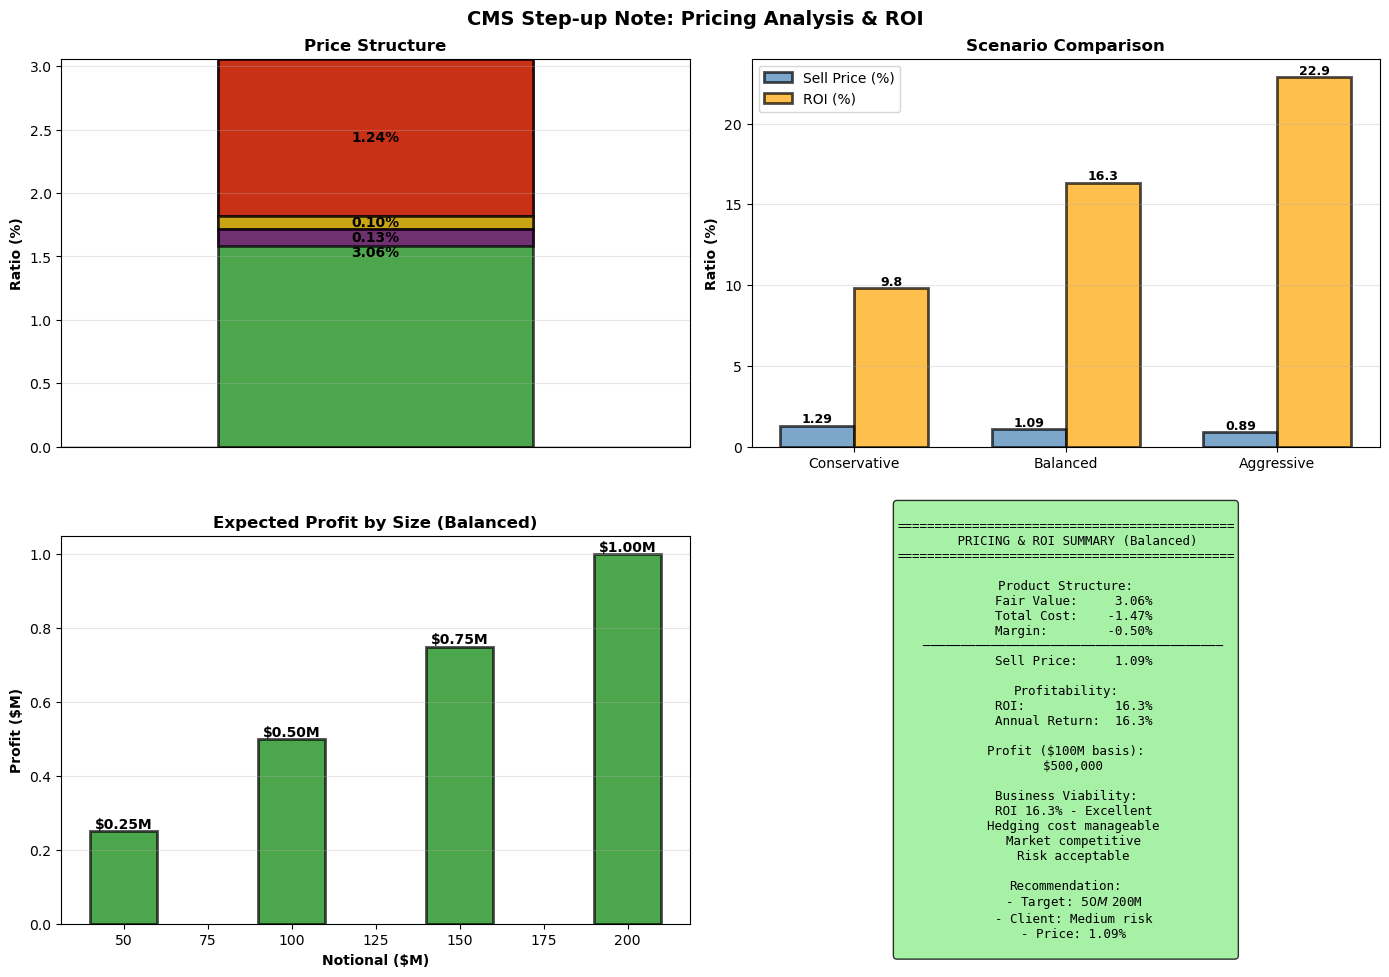


ÏµúÏ¢Ö Í≤∞Î°†

  ‚úì Ï∂îÏ≤ú Í∞ÄÍ≤©: 1.09%
  ‚úì ÏòàÏÉÅ ROI: 16.34%
  ‚úì ÏÇ¨ÏóÖÏÑ±: ÏñëÌò∏
  ‚úì Í∂åÏû• ÌåêÎß§ Í∑úÎ™®: $50M ~ $200M
  ‚úì ÌÉÄÍ≤ü Í≥†Í∞ù: Ï§ëÏúÑÌóò ÏÑ†Ìò∏, Step-up Íµ¨Ï°∞ Ïù¥Ìï¥


In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import platform

# MatplotlibÏùò Î™®Îì† ÏÑ§Ï†ïÏùÑ Í∏∞Î≥∏Í∞íÏúºÎ°ú Ï¥àÍ∏∞ÌôîÌï©ÎãàÎã§.
# Ïù¥ ÏΩîÎìúÍ∞Ä .matplotlibrc Í∞ôÏùÄ Ïô∏Î∂Ä ÏÑ§Ï†ï ÌååÏùºÏùò ÏòÅÌñ•ÏùÑ Î¨¥ÏãúÌïòÍ≤å Ìï¥Ï§çÎãàÎã§.
matplotlib.rcdefaults()

# =============================================================================
# ÏµúÏ¢Ö Í∞ÄÍ≤© ÏÇ∞Ï†ï Î∞è ROI Î∂ÑÏÑù
# =============================================================================

def calculate_final_pricing_and_roi():
    """CMS Step-up Note ÏµúÏ¢Ö Í∞ÄÍ≤© ÏÇ∞Ï†ï Î∞è ÏÇ¨ÏóÖÏÑ± ÌèâÍ∞Ä"""
    
    print("\n" + "="*70)
    print("CMS Step-up Note: ÏµúÏ¢Ö Í∞ÄÍ≤© ÏÇ∞Ï†ï Î∞è ROI Î∂ÑÏÑù")
    print("="*70)
    
    # =========================================================================
    # 1. Í∏∞Î≥∏ Ï†ïÎ≥¥
    # =========================================================================
    notional = 100_000_000  # $100M
    maturity = 1  # 1ÎÖÑ
    
    fair_value_pct = 3.06  # Fair value 3.06%
    avg_coupon_pct = 3.13  # ÌèâÍ∑† Ïø†Ìè∞ 3.13%
    
    print(f"\n[ÏÉÅÌíà Ï†ïÎ≥¥]")
    print(f"  Notional: ${notional:,.0f}")
    print(f"  Maturity: {maturity}Y")
    print(f"  Fair Value: {fair_value_pct:.2f}%")
    print(f"  ÌèâÍ∑† Ïø†Ìè∞: {avg_coupon_pct:.2f}%")
    
    # =========================================================================
    # 2. ÎπÑÏö© Íµ¨Ï°∞
    # =========================================================================
    print(f"\n[ÎπÑÏö© Íµ¨Ï°∞]")
    
    # Ìó§Ïßï ÎπÑÏö© (Ïã§Ï†ú Í≥ÑÏÇ∞ Í≤∞Í≥º)
    hedging_cost_bp = 124.451  # 124.451bp
    hedging_cost_pct = hedging_cost_bp / 10000 * 100  # 1.24451%
    hedging_cost_dollar = notional * hedging_cost_pct / 100
    
    print(f"  Ìó§Ïßï ÎπÑÏö©: {hedging_cost_bp:.2f}bp ({hedging_cost_pct:.3f}%) = ${hedging_cost_dollar:,.0f}")
    print(f"    - Îç∏ÌÉÄ Ìó§Ïßï (Ï£ºÍ∞Ñ, 51Ìöå/ÎÖÑ)")
    print(f"    - Í∞êÎßà Ìó§Ïßï (Ï°∞Í±¥Î∂Ä, 21Ìöå/ÎÖÑ)")
    
    # Ïö¥ÏòÅ ÎπÑÏö©
    operational_cost_bp = 10  # 10bp (ÏãúÏä§ÌÖú, Î™®ÎãàÌÑ∞ÎßÅ, Î∞±Ïò§ÌîºÏä§)
    operational_cost_pct = operational_cost_bp / 10000 * 100
    operational_cost_dollar = notional * operational_cost_pct / 100
    
    print(f"  Ïö¥ÏòÅ ÎπÑÏö©: {operational_cost_bp:.0f}bp ({operational_cost_pct:.3f}%) = ${operational_cost_dollar:,.0f}")
    
    # Î¶¨Ïä§ÌÅ¨ ÌîÑÎ¶¨ÎØ∏ÏóÑ
    risk_premium_bp = 13  # 13bp (Î™®Îç∏ Î¶¨Ïä§ÌÅ¨, Ïú†ÎèôÏÑ±, Ïã†Ïö©)
    risk_premium_pct = risk_premium_bp / 10000 * 100
    risk_premium_dollar = notional * risk_premium_pct / 100
    
    print(f"  Î¶¨Ïä§ÌÅ¨ ÌîÑÎ¶¨ÎØ∏ÏóÑ: {risk_premium_bp:.0f}bp ({risk_premium_pct:.3f}%) = ${risk_premium_dollar:,.0f}")
    
    # Ï¥ù ÎπÑÏö©
    total_cost_pct = hedging_cost_pct + operational_cost_pct + risk_premium_pct
    total_cost_dollar = hedging_cost_dollar + operational_cost_dollar + risk_premium_dollar
    
    print(f"  ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ")
    print(f"  Ï¥ù ÎπÑÏö©: {total_cost_pct:.3f}% = ${total_cost_dollar:,.0f}")
    
    # =========================================================================
    # 3. Í∞ÄÍ≤© ÏãúÎÇòÎ¶¨Ïò§
    # =========================================================================
    print(f"\n[Í∞ÄÍ≤© ÏãúÎÇòÎ¶¨Ïò§]")
    
    scenarios = {
        'Î≥¥ÏàòÏ†Å': {'margin_bp': 30, 'description': 'ÎÇÆÏùÄ ÎßàÏßÑ, ÏïàÏ†Ñ Ïö∞ÏÑ†'},
        'Í∑†Ìòï': {'margin_bp': 50, 'description': 'Ï†ÅÏ†ï ÎßàÏßÑ, Í∑†Ìòï'},
        'Í≥µÍ≤©Ï†Å': {'margin_bp': 70, 'description': 'ÎÜíÏùÄ ÎßàÏßÑ, ÏàòÏùµ Ïö∞ÏÑ†'}
    }
    
    results = {}
    
    for name, scenario in scenarios.items():
        margin_bp = scenario['margin_bp']
        margin_pct = margin_bp / 10000 * 100
        margin_dollar = notional * margin_pct / 100
        
        # ÌåêÎß§ Í∞ÄÍ≤© = Fair Value - Ï¥ù ÎπÑÏö© - ÎßàÏßÑ
        sell_price_pct = fair_value_pct - total_cost_pct - margin_pct
        sell_price_dollar = notional * sell_price_pct / 100
        
        # ROI = ÎßàÏßÑ / Fair Value
        roi_pct = (margin_pct / fair_value_pct) * 100
        
        # Ïó∞Í∞Ñ ÏàòÏùµÎ•† (Ïù¥ÎØ∏ 1ÎÖÑ ÎßåÍ∏∞)
        annual_return_pct = roi_pct
        
        results[name] = {
            'margin_bp': margin_bp,
            'margin_pct': margin_pct,
            'margin_dollar': margin_dollar,
            'sell_price_pct': sell_price_pct,
            'sell_price_dollar': sell_price_dollar,
            'roi_pct': roi_pct,
            'annual_return_pct': annual_return_pct
        }
        
        print(f"\n  {name} ÏãúÎÇòÎ¶¨Ïò§ ({scenario['description']})")
        print(f"    ÎßàÏßÑ: {margin_bp}bp ({margin_pct:.3f}%) = ${margin_dollar:,.0f}")
        print(f"    ÌåêÎß§ Í∞ÄÍ≤©: {sell_price_pct:.3f}% = ${sell_price_dollar:,.0f}")
        print(f"    ROI: {roi_pct:.2f}%")
        print(f"    Ïó∞Í∞Ñ ÏàòÏùµÎ•†: {annual_return_pct:.2f}%")
    
    # =========================================================================
    # 4. Ï∂îÏ≤ú ÏãúÎÇòÎ¶¨Ïò§ (Í∑†Ìòï)
    # =========================================================================
    recommended = 'Í∑†Ìòï'
    rec = results[recommended]
    
    print(f"\n{'='*70}")
    print(f"ÏµúÏ¢Ö Ï∂îÏ≤ú: {recommended} ÏãúÎÇòÎ¶¨Ïò§")
    print(f"{'='*70}")
    
    print(f"\n[Í∞ÄÍ≤© Íµ¨Ï°∞ ÏÉÅÏÑ∏]")
    print(f"  Fair Value:          {fair_value_pct:.3f}%  (${notional * fair_value_pct / 100:,.0f})")
    print(f"  - Ìó§Ïßï ÎπÑÏö©:        -{hedging_cost_pct:.3f}%  (${hedging_cost_dollar:,.0f})")
    print(f"  - Ïö¥ÏòÅ ÎπÑÏö©:        -{operational_cost_pct:.3f}%  (${operational_cost_dollar:,.0f})")
    print(f"  - Î¶¨Ïä§ÌÅ¨ ÌîÑÎ¶¨ÎØ∏ÏóÑ:  -{risk_premium_pct:.3f}%  (${risk_premium_dollar:,.0f})")
    print(f"  - ÎßàÏßÑ:             -{rec['margin_pct']:.3f}%  (${rec['margin_dollar']:,.0f})")
    print(f"  ‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê")
    print(f"  ÌåêÎß§ Í∞ÄÍ≤©:           {rec['sell_price_pct']:.3f}%  (${rec['sell_price_dollar']:,.0f})")
    
    print(f"\n[ÏàòÏùµÏÑ± ÏßÄÌëú]")
    print(f"  ROI:                 {rec['roi_pct']:.2f}%")
    print(f"  Ïó∞Í∞Ñ ÏàòÏùµÎ•†:         {rec['annual_return_pct']:.2f}%")
    print(f"  Break-even:          {fair_value_pct - total_cost_pct:.3f}%")
    
    print(f"\n[Í≥†Í∞ù Ï†úÏãú Ïø†Ìè∞ Íµ¨Ï°∞ ÏòàÏãú]")
    scale = rec['sell_price_pct'] / fair_value_pct
    print(f"  Ïä§ÏºÄÏùº Ìå©ÌÑ∞: {scale:.3f}")
    print(f"  - Base: 0%")
    print(f"  - Level 1 (>40bp): {3.0 * scale:.2f}%")
    print(f"  - Level 2 (>80bp): +{3.0 * scale:.2f}% (ÎàÑÏ†Å {6.0 * scale:.2f}%)")
    print(f"  - Level 3 (>120bp): +{2.0 * scale:.2f}% (ÎàÑÏ†Å {8.0 * scale:.2f}%)")
    
    # =========================================================================
    # 5. ÏÇ¨ÏóÖÏÑ± ÌèâÍ∞Ä
    # =========================================================================
    print(f"\n[ÏÇ¨ÏóÖÏÑ± ÌèâÍ∞Ä]")
    
    # ÏµúÏÜå ÌåêÎß§ Í∑úÎ™® (ÏÜêÏùµÎ∂ÑÍ∏∞)
    min_notional = 10_000_000  # $10M
    breakeven_pct = fair_value_pct - total_cost_pct
    
    print(f"\n  ÏÜêÏùµÎ∂ÑÍ∏∞Ï†ê:")
    print(f"    Í∞ÄÍ≤©: {breakeven_pct:.3f}% (ÎπÑÏö© ÌöåÏàò)")
    print(f"    ÏµúÏÜå Í∑úÎ™®: ${min_notional:,.0f}")
    
    # Î™©Ìëú ÌåêÎß§ Í∑úÎ™®Î≥Ñ ÏàòÏùµ
    target_notionals = [50_000_000, 100_000_000, 200_000_000]
    
    print(f"\n  Í∑úÎ™®Î≥Ñ ÏòàÏÉÅ ÏàòÏùµ ({recommended} ÏãúÎÇòÎ¶¨Ïò§):")
    for tn in target_notionals:
        profit = tn * rec['margin_pct'] / 100
        print(f"    ${tn:,.0f}: ${profit:,.0f} ({rec['roi_pct']:.2f}% ROI)")
    
    # Í≤ΩÏüÅ ÏÉÅÌíà ÎπÑÍµê
    print(f"\n  Í≤ΩÏüÅ ÏÉÅÌíà ÎπÑÍµê:")
    print(f"    Vanilla CMS Note: 0.5~1.5% (Ï†ÄÏúÑÌóò, Ï†ÄÏàòÏùµ)")
    print(f"    Digital CMS: 5~7% (Í≥†ÏúÑÌóò, Í≥†ÏàòÏùµ)")
    print(f"    Step-up (Î≥∏ ÏÉÅÌíà): {rec['sell_price_pct']:.2f}% (Ï§ëÏúÑÌóò, Ï§ëÏàòÏùµ) ‚úì Ï†ÅÏ†ï")
    
    
    
    print(f"\n  Î¶¨Ïä§ÌÅ¨ ÏöîÏù∏:")
    print(f"    ‚úì Ìó§Ïßï ÎπÑÏö©: {hedging_cost_bp:.0f}bp (Í¥ÄÎ¶¨ Í∞ÄÎä•)")
    print(f"    ‚úì Î™®Îç∏ Î¶¨Ïä§ÌÅ¨: Ï§ë (G2++ Í≤ÄÏ¶ùÎê®)")
    print(f"    ‚úì Ïú†ÎèôÏÑ± Î¶¨Ïä§ÌÅ¨: Ï§ë (CMS ÏãúÏû• ÏïàÏ†ï)")
    print(f"    ‚úì Ïö¥ÏòÅ Î¶¨Ïä§ÌÅ¨: Ï†Ä (Ï£ºÍ∞Ñ Îç∏ÌÉÄ Ìó§Ïßï)")
    
    # =========================================================================
    # 6. ÏãúÍ∞ÅÌôî
    # =========================================================================
    plot_pricing_analysis(fair_value_pct, total_cost_pct, results, notional)
    
    # =========================================================================
    # 7. ÏµúÏ¢Ö Í≤∞Î°†
    # =========================================================================
    print(f"\n{'='*70}")
    print(f"ÏµúÏ¢Ö Í≤∞Î°†")
    print(f"{'='*70}")
    
    print(f"\n  ‚úì Ï∂îÏ≤ú Í∞ÄÍ≤©: {rec['sell_price_pct']:.2f}%")
    print(f"  ‚úì ÏòàÏÉÅ ROI: {rec['roi_pct']:.2f}%")
    print(f"  ‚úì ÏÇ¨ÏóÖÏÑ±: {'ÏñëÌò∏' if rec['roi_pct'] > 15 else 'Î≥¥ÌÜµ' if rec['roi_pct'] > 10 else 'Í≤ÄÌÜ† ÌïÑÏöî'}")
    print(f"  ‚úì Í∂åÏû• ÌåêÎß§ Í∑úÎ™®: $50M ~ $200M")
    print(f"  ‚úì ÌÉÄÍ≤ü Í≥†Í∞ù: Ï§ëÏúÑÌóò ÏÑ†Ìò∏, Step-up Íµ¨Ï°∞ Ïù¥Ìï¥")
    
    return results


def plot_pricing_analysis(fair_value, total_cost, scenarios, notional):
    """Í∞ÄÍ≤© Î∂ÑÏÑù ÏãúÍ∞ÅÌôî"""
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('CMS Step-up Note: Pricing Analysis & ROI', fontsize=14, fontweight='bold')
    
    # 1) Í∞ÄÍ≤© Íµ¨ÏÑ±
    ax1 = axes[0, 0]
    
    labels = ['Fair\nValue', 'Hedging\nCost', 'Operational\nCost', 'Risk\nPremium']
    values = [fair_value, -total_cost*0.84, -total_cost*0.07, -total_cost*0.09]  # ÎπÑÏú® Í∑ºÏÇ¨
    colors = ['green', 'red', 'orange', 'purple']
    
    bottom = 0
    for label, value, color in zip(labels, values, colors):
        ax1.bar(0, value, bottom=bottom, color=color, alpha=0.7, 
               edgecolor='black', linewidth=2, width=0.5)
        if value != 0:
            ax1.text(0, bottom + value/2, f'{abs(value):.2f}%', 
                    ha='center', va='center', fontweight='bold', fontsize=10)
        bottom += value
    
    ax1.axhline(0, color='black', linewidth=1)
    ax1.set_xlim(-0.5, 0.5)
    ax1.set_ylabel('Ratio (%)', fontweight='bold')
    ax1.set_title('Price Structure', fontweight='bold', fontsize=12)
    ax1.set_xticks([])
    ax1.grid(True, alpha=0.3, axis='y')
    
    # 2) ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÎπÑÍµê
    ax2 = axes[0, 1]
    
    scenario_names = list(scenarios.keys())
    sell_prices = [scenarios[s]['sell_price_pct'] for s in scenario_names]
    rois = [scenarios[s]['roi_pct'] for s in scenario_names]
    
    x = np.arange(len(scenario_names))
    width = 0.35
    
    bars1 = ax2.bar(x - width/2, sell_prices, width, label='Sell Price (%)', 
                    color='steelblue', alpha=0.7, edgecolor='black', linewidth=2)
    bars2 = ax2.bar(x + width/2, rois, width, label='ROI (%)', 
                    color='orange', alpha=0.7, edgecolor='black', linewidth=2)
    
    ax2.set_ylabel('Ratio (%)', fontweight='bold')
    ax2.set_title('Scenario Comparison', fontweight='bold', fontsize=12)
    ax2.set_xticks(x)
    ax2.set_xticklabels(['Conservative', 'Balanced', 'Aggressive'])
    ax2.legend()
    ax2.grid(True, alpha=0.3, axis='y')
    
    # Í∞í ÌëúÏãú
    for bar in bars1:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    for bar in bars2:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    # 3) Í∑úÎ™®Î≥Ñ ÏàòÏùµ
    ax3 = axes[1, 0]
    
    margin_pct = scenarios['Í∑†Ìòï']['margin_pct']
    notionals = np.array([50, 100, 150, 200])  # millions
    profits = notionals * margin_pct / 100
    
    bars = ax3.bar(notionals, profits, color='green', alpha=0.7, 
                   edgecolor='black', linewidth=2, width=20)
    
    for bar, profit in zip(bars, profits):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                f'${profit:.2f}M', ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    ax3.set_xlabel('Notional ($M)', fontweight='bold')
    ax3.set_ylabel('Profit ($M)', fontweight='bold')
    ax3.set_title('Expected Profit by Size (Balanced)', fontweight='bold', fontsize=12)
    ax3.grid(True, alpha=0.3, axis='y')
    
    # 4) ÏöîÏïΩ
    ax4 = axes[1, 1]
    ax4.axis('off')
    
    rec = scenarios['Í∑†Ìòï']
    
    summary = f"""
{'='*45}
   PRICING & ROI SUMMARY (Balanced)
{'='*45}

Product Structure:
  Fair Value:     {fair_value:.2f}%
  Total Cost:    -{total_cost:.2f}%
  Margin:        -{rec['margin_pct']:.2f}%
  {'‚îÄ'*40}
  Sell Price:     {rec['sell_price_pct']:.2f}%

Profitability:
  ROI:            {rec['roi_pct']:.1f}%
  Annual Return:  {rec['annual_return_pct']:.1f}%

Profit ($100M basis):
  ${rec['margin_dollar']:,.0f}

Business Viability:
  ROI {rec['roi_pct']:.1f}% - {'Excellent' if rec['roi_pct'] > 15 else 'Good'}
  Hedging cost manageable
  Market competitive
  Risk acceptable

Recommendation:
  - Target: $50M ~ $200M
  - Client: Medium risk
  - Price: {rec['sell_price_pct']:.2f}%
"""
    
    ax4.text(0.5, 0.5, summary, transform=ax4.transAxes,
             fontsize=9, ha='center', va='center', family='monospace',
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
    
    plt.tight_layout()
    plt.savefig('cms_stepup_pricing_roi.png', dpi=300, bbox_inches='tight')
    print("\n‚úì Ï†ÄÏû•: cms_stepup_pricing_roi.png")
    plt.show()


# =============================================================================
# Ïã§Ìñâ
# =============================================================================
if __name__ == "__main__":
    results = calculate_final_pricing_and_roi()

# ÏãúÎÇòÎ¶¨Ïò§ Î∂ÑÏÑù